In [1200]:
import pandas as pd
import numpy as np
from scipy import stats
import warnings
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [1201]:
# Import the CSV file
csv_file_path = 'ontario-air-quality-sample.csv'  # Replace with the path to your CSV file
df = pd.read_csv(csv_file_path)

In [1202]:
print(df)

             Date            City   PM25     O3    NO2   SO2    CO
0      2023-10-02   Toronto-North  36.00  40.00  11.00  1.00  3.00
1      2023-10-03   Toronto-North  38.00  49.00  19.00  1.00  1.00
2      2023-10-04   Toronto-North  54.00  39.00  13.00  1.00  1.00
3      2023-10-05   Toronto-North  57.00  35.00   8.00  1.00  1.00
4      2023-10-06   Toronto-North  46.00  30.00   7.00  1.00  1.00
...           ...             ...    ...    ...    ...   ...   ...
21121  2015-07-18  Toronto- West          34.00   8.00  1.00  2.00
21122  2015-01-01  Toronto- West          18.00   8.00  2.00   NaN
21123  2015-01-17  Toronto- West          19.00  25.00  2.00  3.00
21124  2015-03-11  Toronto- West          25.00  20.00  2.00  2.00
21125  2014-01-01  Toronto- West          21.00  12.00  1.00  1.00

[21126 rows x 7 columns]


In [1203]:
df.head()

,Date,City,PM25,O3,NO2,SO2,CO
0,2023-10-02,Toronto-North,36.00,40.00,11.00,1.00,3.00
1,2023-10-03,Toronto-North,38.00,49.00,19.00,1.00,1.00
2,2023-10-04,Toronto-North,54.00,39.00,13.00,1.00,1.00
3,2023-10-05,Toronto-North,57.00,35.00,8.00,1.00,1.00
4,2023-10-06,Toronto-North,46.00,30.00,7.00,1.00,1.00


In [1204]:
df.isnull().sum()

Date       0
City       0
PM25       0
O3         0
NO2        0
SO2     2164
CO       520
dtype: int64

In [1205]:
df.info

<bound method DataFrame.info of              Date            City   PM25     O3    NO2   SO2    CO
0      2023-10-02   Toronto-North  36.00  40.00  11.00  1.00  3.00
1      2023-10-03   Toronto-North  38.00  49.00  19.00  1.00  1.00
2      2023-10-04   Toronto-North  54.00  39.00  13.00  1.00  1.00
3      2023-10-05   Toronto-North  57.00  35.00   8.00  1.00  1.00
4      2023-10-06   Toronto-North  46.00  30.00   7.00  1.00  1.00
...           ...             ...    ...    ...    ...   ...   ...
21121  2015-07-18  Toronto- West          34.00   8.00  1.00  2.00
21122  2015-01-01  Toronto- West          18.00   8.00  2.00   NaN
21123  2015-01-17  Toronto- West          19.00  25.00  2.00  3.00
21124  2015-03-11  Toronto- West          25.00  20.00  2.00  2.00
21125  2014-01-01  Toronto- West          21.00  12.00  1.00  1.00

[21126 rows x 7 columns]>

In [1206]:
df.describe()

,Date,City,PM25,O3,NO2,SO2,CO
count,21126,21126,21126,21126,21126,18962,20606
unique,3537,6,126,73,46,14,11
top,2023-10-02,Toronto-East,23.00,24.00,6.00,1.00,
freq,6,3537,673,1099,1614,17858,9327


In [1207]:
100 - (len(df.dropna())/len(df))*100

11.724888762662118

In [1208]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [1209]:
df = pd.read_csv("ontario-air-quality-sample.csv", na_values=' ')
df

,Date,City,PM25,O3,NO2,SO2,CO
0,2023-10-02,Toronto-North,36.0,40.0,11.0,1.00,3.0
1,2023-10-03,Toronto-North,38.0,49.0,19.0,1.00,1.0
2,2023-10-04,Toronto-North,54.0,39.0,13.0,1.00,1.0
3,2023-10-05,Toronto-North,57.0,35.0,8.0,1.00,1.0
4,2023-10-06,Toronto-North,46.0,30.0,7.0,1.00,1.0
...,...,...,...,...,...,...,...
21121,2015-07-18,Toronto- West,NaN,34.0,8.0,1.00,2.0
21122,2015-01-01,Toronto- West,NaN,18.0,8.0,2.00,NaN
21123,2015-01-17,Toronto- West,NaN,19.0,25.0,2.00,3.0
21124,2015-03-11,Toronto- West,NaN,25.0,20.0,2.00,2.0


In [1210]:
col = df.columns
print("The different columns are: \n",col)

The different columns are: 
 Index(['Date', 'City', 'PM25', 'O3', 'NO2', 'SO2', 'CO'], dtype='object')


In [1211]:
# To check different datatypes in out dataset. 
d_types = df.dtypes
print("The different Data Types are:\n",d_types)

The different Data Types are:
 Date     object
City     object
PM25    float64
O3      float64
NO2     float64
SO2      object
CO      float64
dtype: object


In [1212]:
non_numeric_mask = pd.to_numeric(df['SO2'], errors='coerce').isna()

# Replace non-numeric values with NaN
df.loc[non_numeric_mask, 'SO2'] = None

In [1213]:
df['SO2'] = df['SO2'].astype(float)

In [1214]:
data_type = df['SO2'].dtype

# Print the data type for SO2 Column
print(data_type)


float64


In [1215]:
d_types = df.dtypes
print("The different Data Types are:\n",d_types)

The different Data Types are:
 Date     object
City     object
PM25    float64
O3      float64
NO2     float64
SO2     float64
CO      float64
dtype: object


In [1216]:
# To check the shape of the dataset.
shape_dataset = df.shape
print("The Shape of dataset is: \n",shape_dataset)

The Shape of dataset is: 
 (21126, 7)


In [1217]:
#To find the missing values in dataset
missing_counts = df.isnull().sum()
print("The missing values are:\n",missing_counts)

The missing values are:
 Date       0
City       0
PM25     111
O3        93
NO2      159
SO2     2165
CO      9847
dtype: int64


In [1218]:
# # We'll fill the missing values in Dependents, Married, Gender, self_Employed, Loan_Amount_Term and Credit_History with the help of mode. 
# df['Date'].fillna(df['Date'].mode()[0],inplace = True)
# df['City'].fillna(df['City'].mode()[0],inplace=True)
# df['PM25'].fillna(df['PM25'].mode()[0],inplace=True)
# df['O3'].fillna(df['O3'].mode()[0],inplace=True)
# df['NO2'].fillna(df['NO2'].mode()[0],inplace=True)
# df['SO2'].fillna(df['SO2'].mode()[0],inplace =True)

In [1219]:
df

,Date,City,PM25,O3,NO2,SO2,CO
0,2023-10-02,Toronto-North,36.0,40.0,11.0,1.0,3.0
1,2023-10-03,Toronto-North,38.0,49.0,19.0,1.0,1.0
2,2023-10-04,Toronto-North,54.0,39.0,13.0,1.0,1.0
3,2023-10-05,Toronto-North,57.0,35.0,8.0,1.0,1.0
4,2023-10-06,Toronto-North,46.0,30.0,7.0,1.0,1.0
...,...,...,...,...,...,...,...
21121,2015-07-18,Toronto- West,NaN,34.0,8.0,1.0,2.0
21122,2015-01-01,Toronto- West,NaN,18.0,8.0,2.0,NaN
21123,2015-01-17,Toronto- West,NaN,19.0,25.0,2.0,3.0
21124,2015-03-11,Toronto- West,NaN,25.0,20.0,2.0,2.0


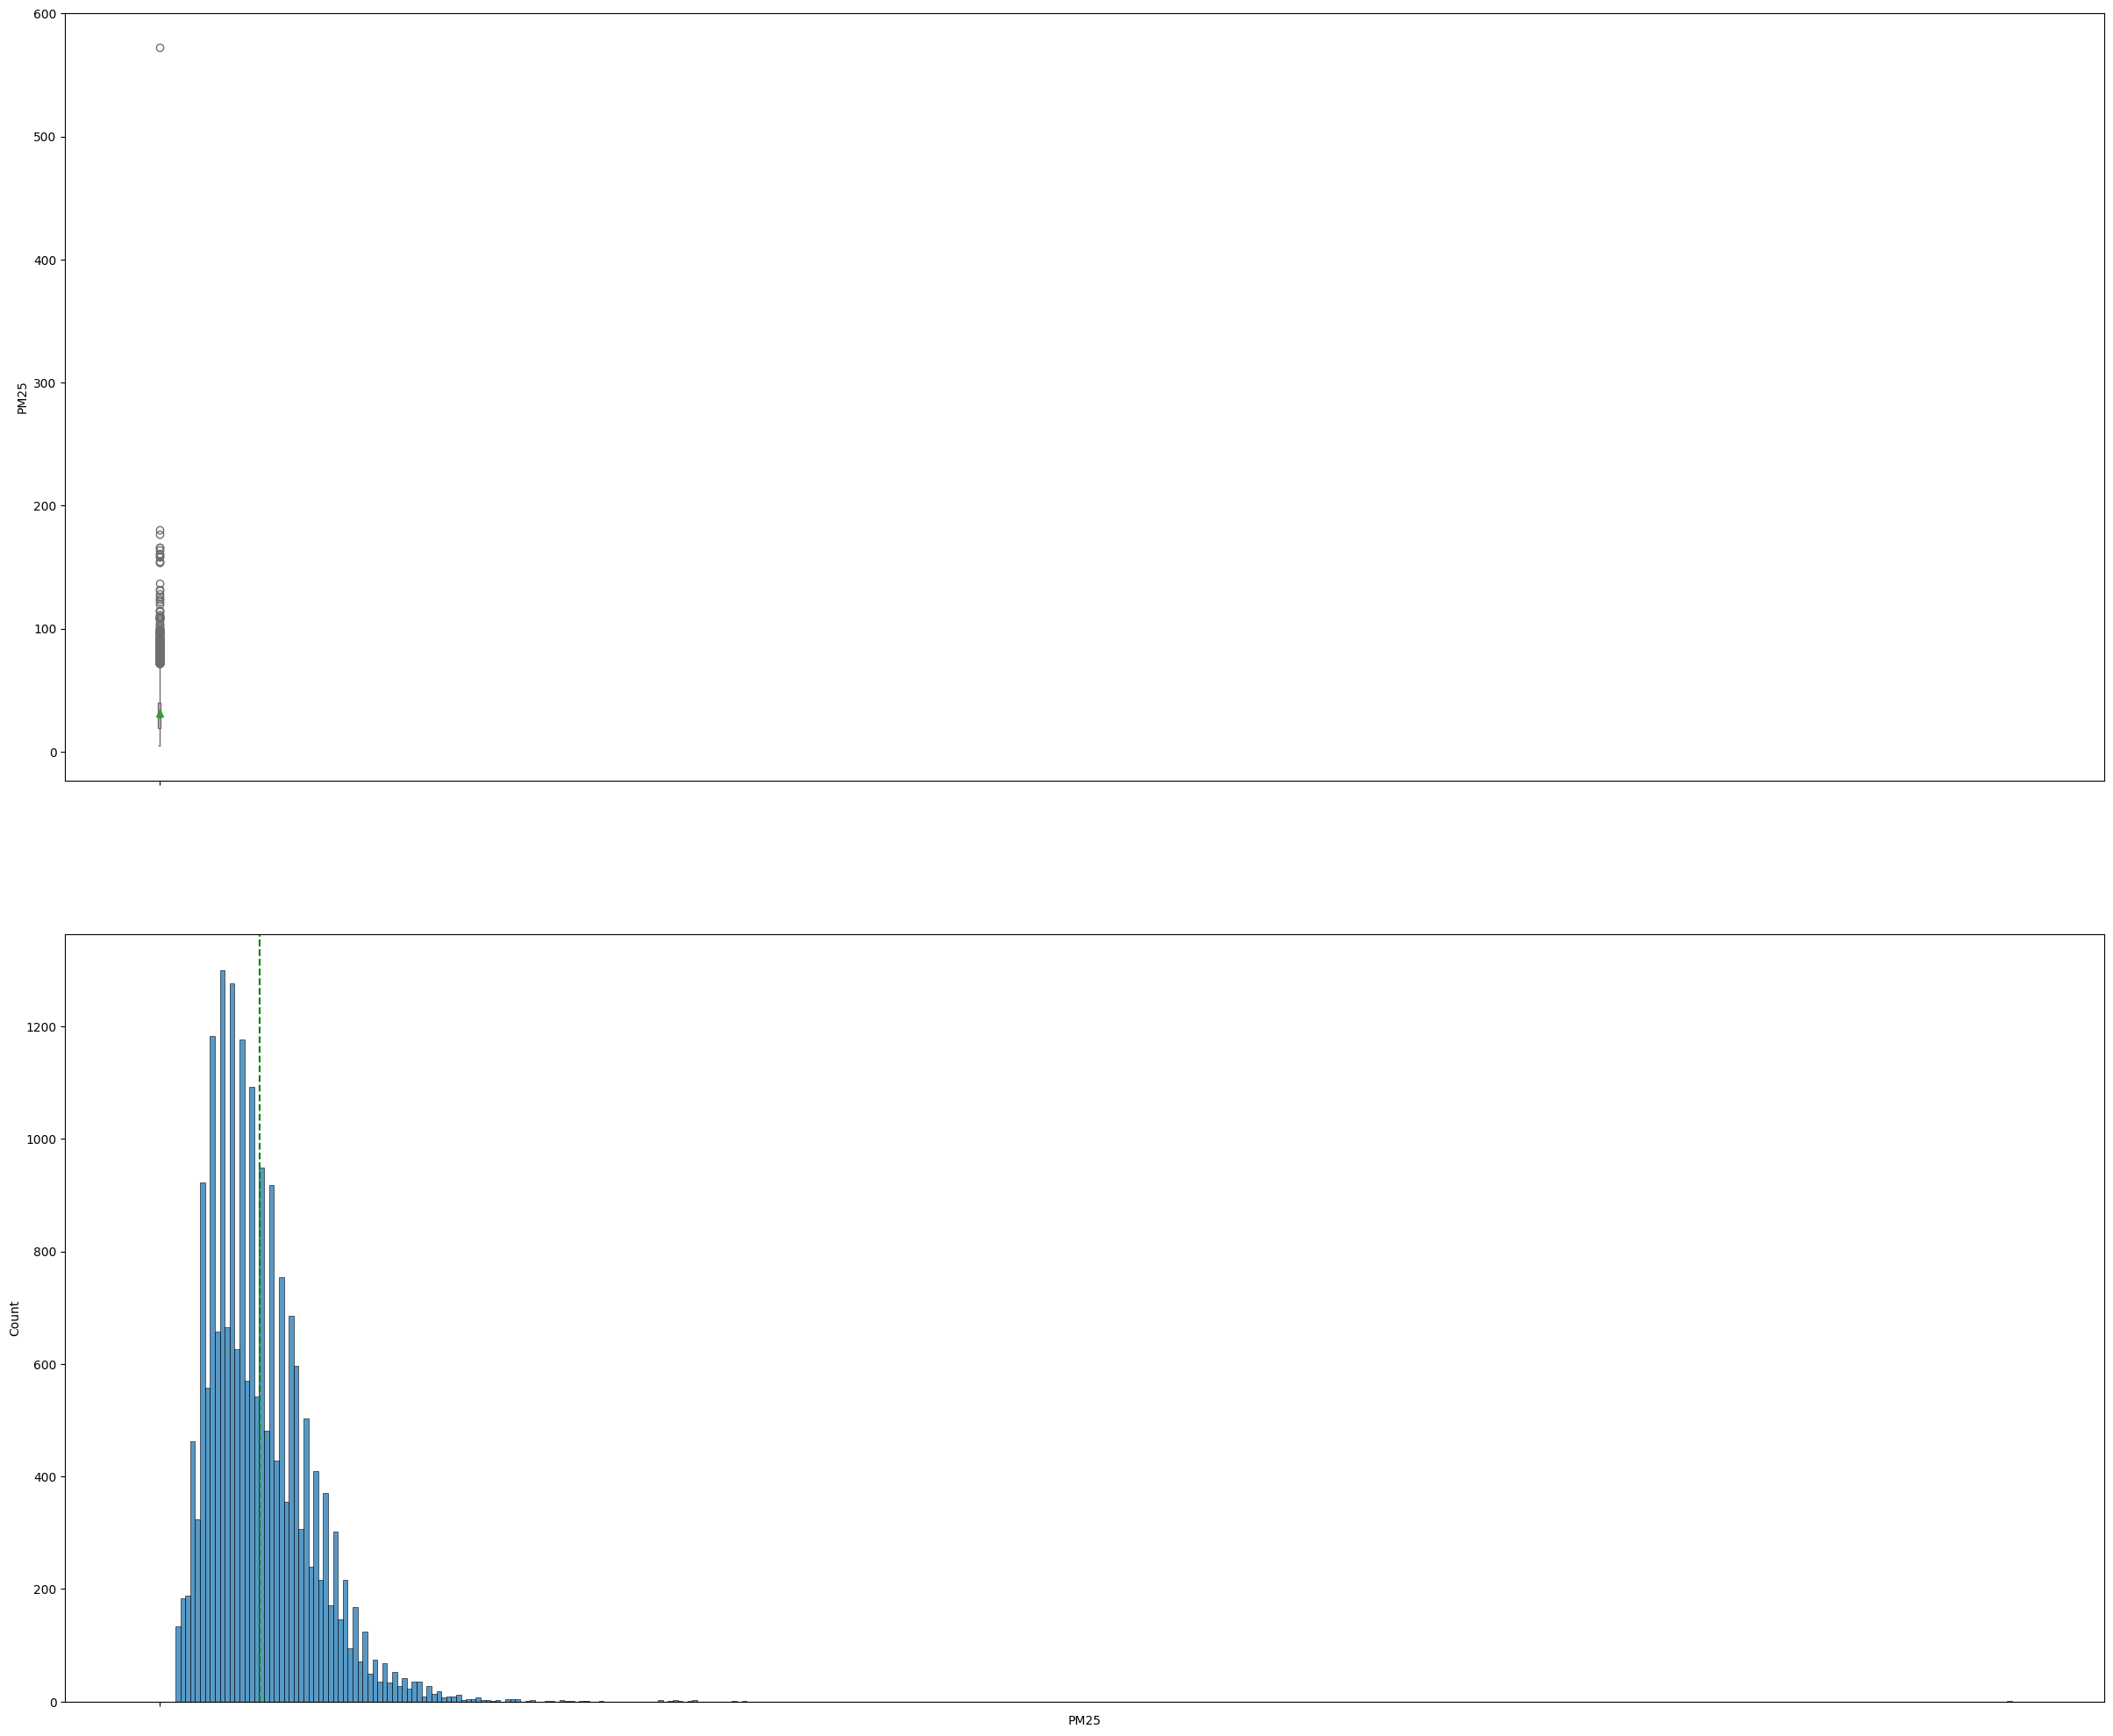

In [1220]:
def histogram_boxplot(feature, figsize=(30, 25), bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet')  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(feature, kde=False, ax=ax_hist2, bins=bins, palette="winter") if bins else sns.histplot(feature, kde=False, ax=ax_hist2)

    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--')  # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='blue', linestyle='-')  # Add median to the histogram

# Corrected function call
histogram_boxplot(df['PM25'])


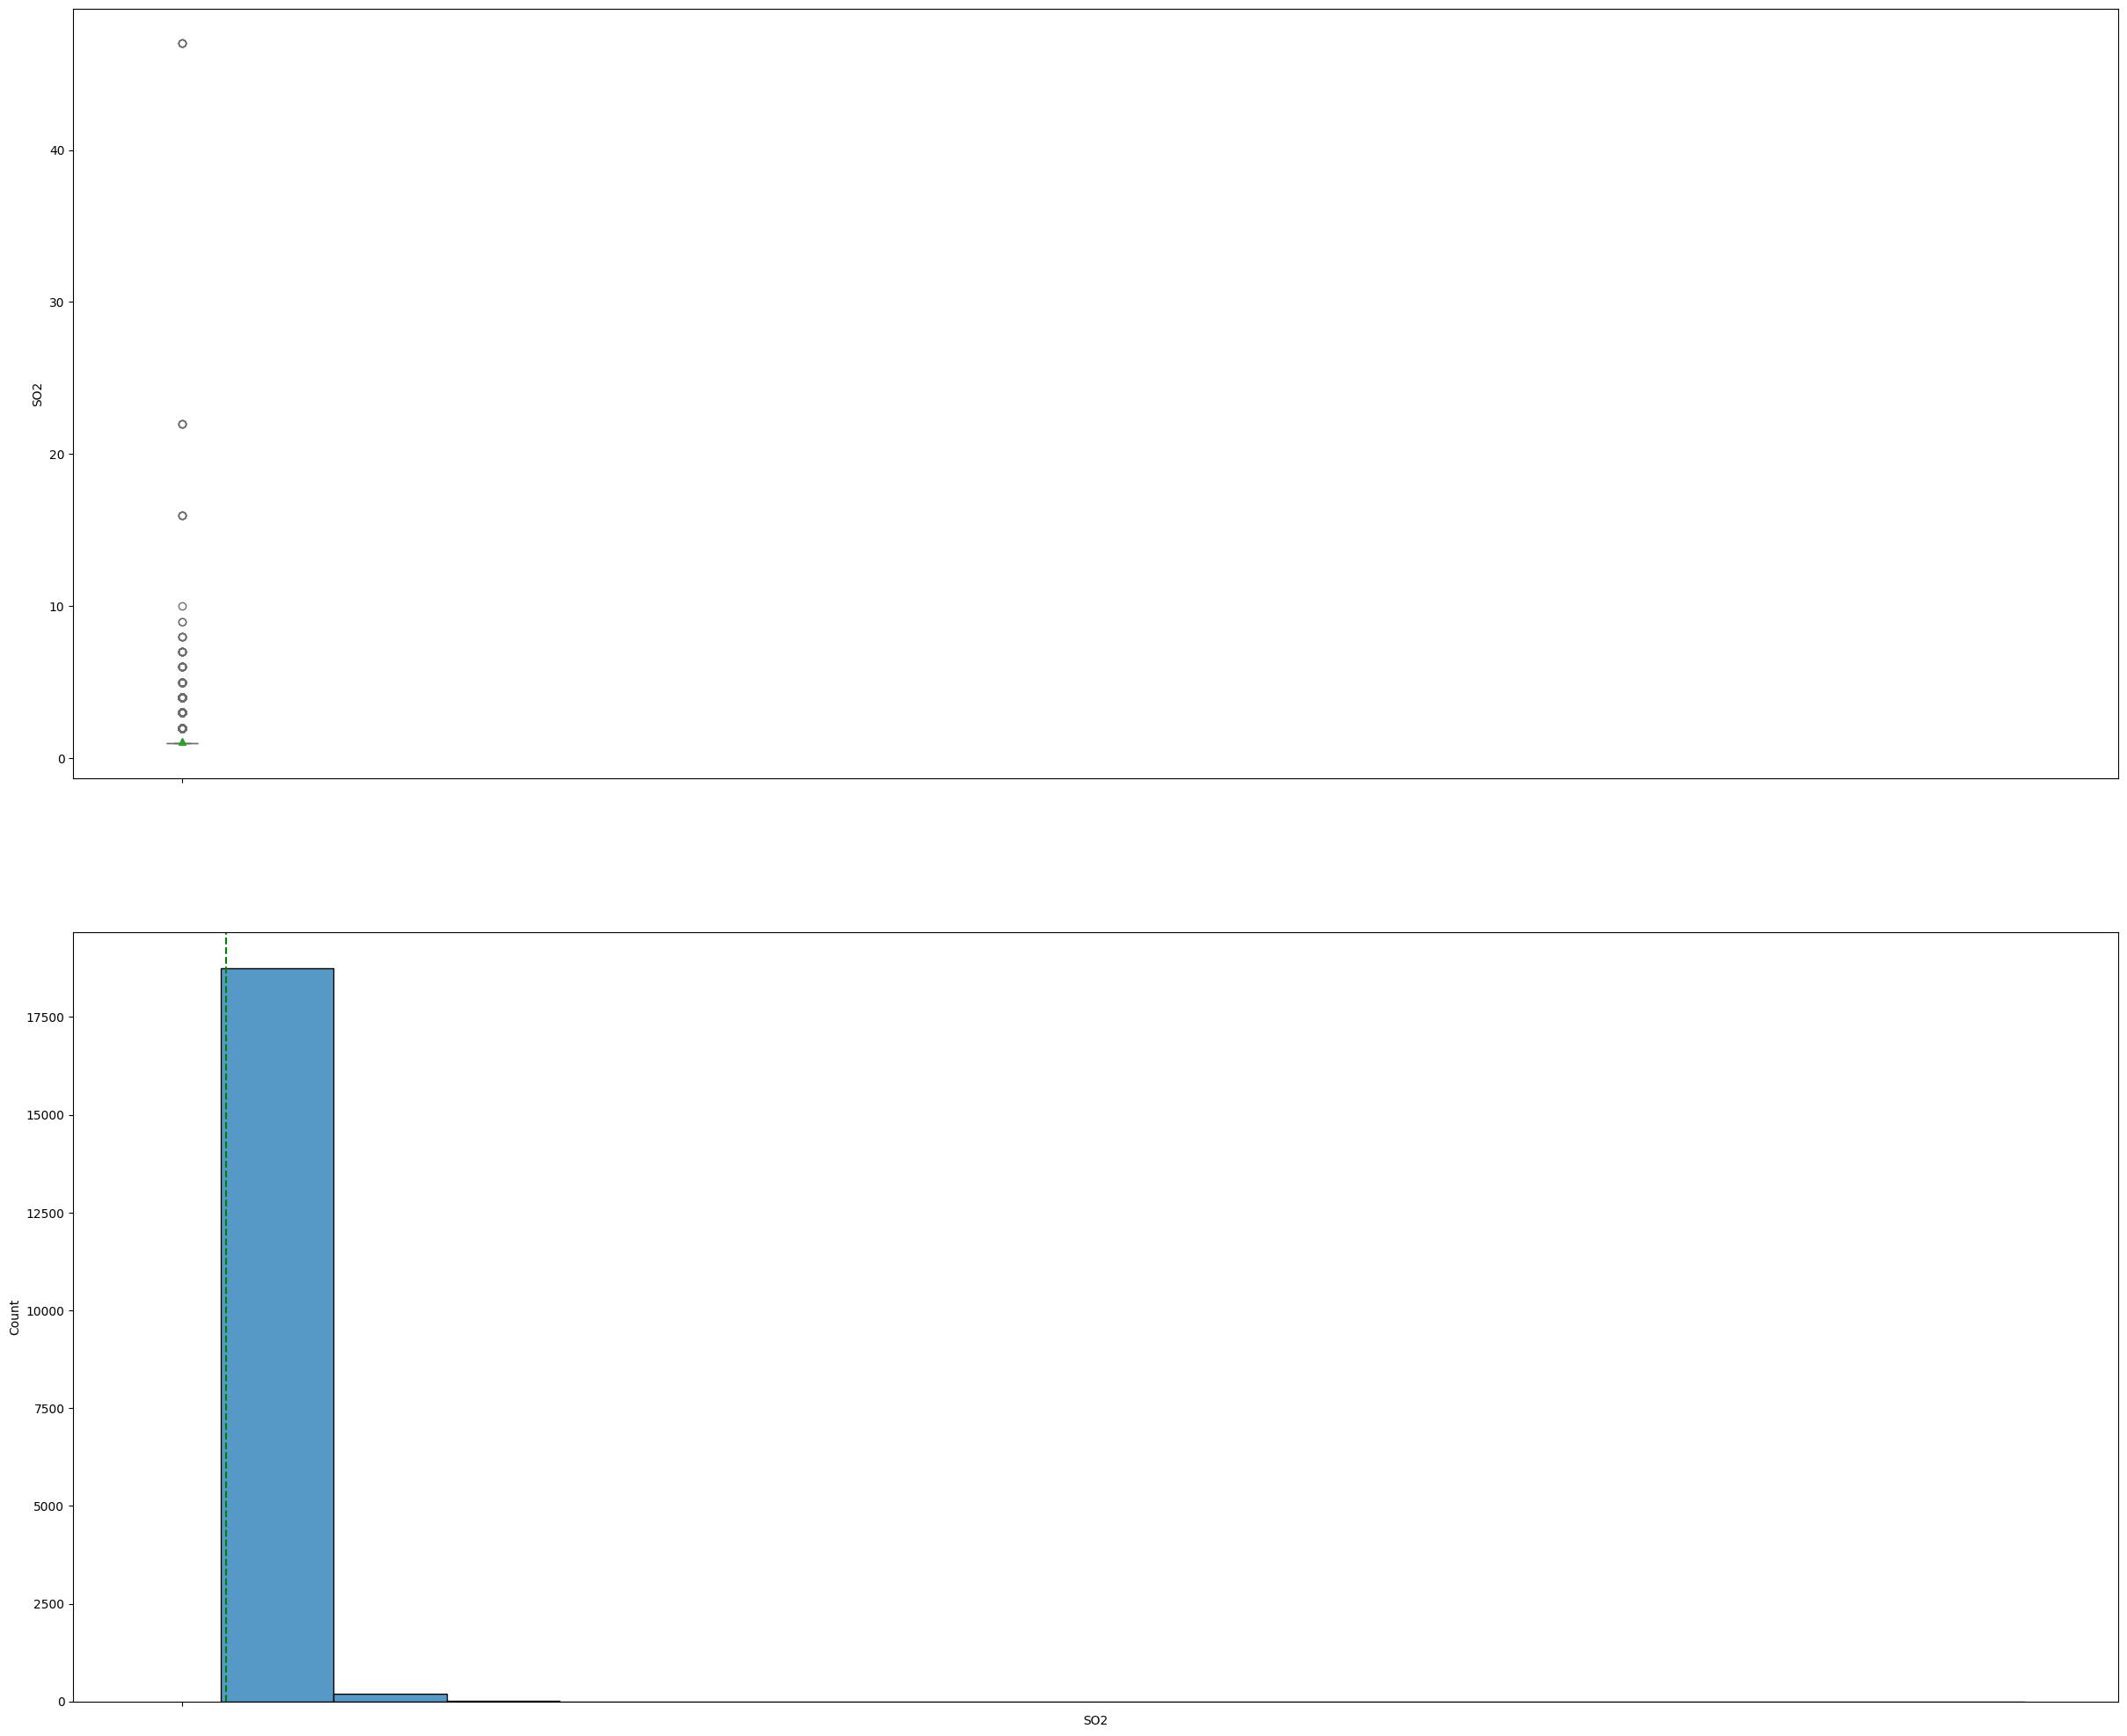

In [1221]:
histogram_boxplot(df['SO2'])

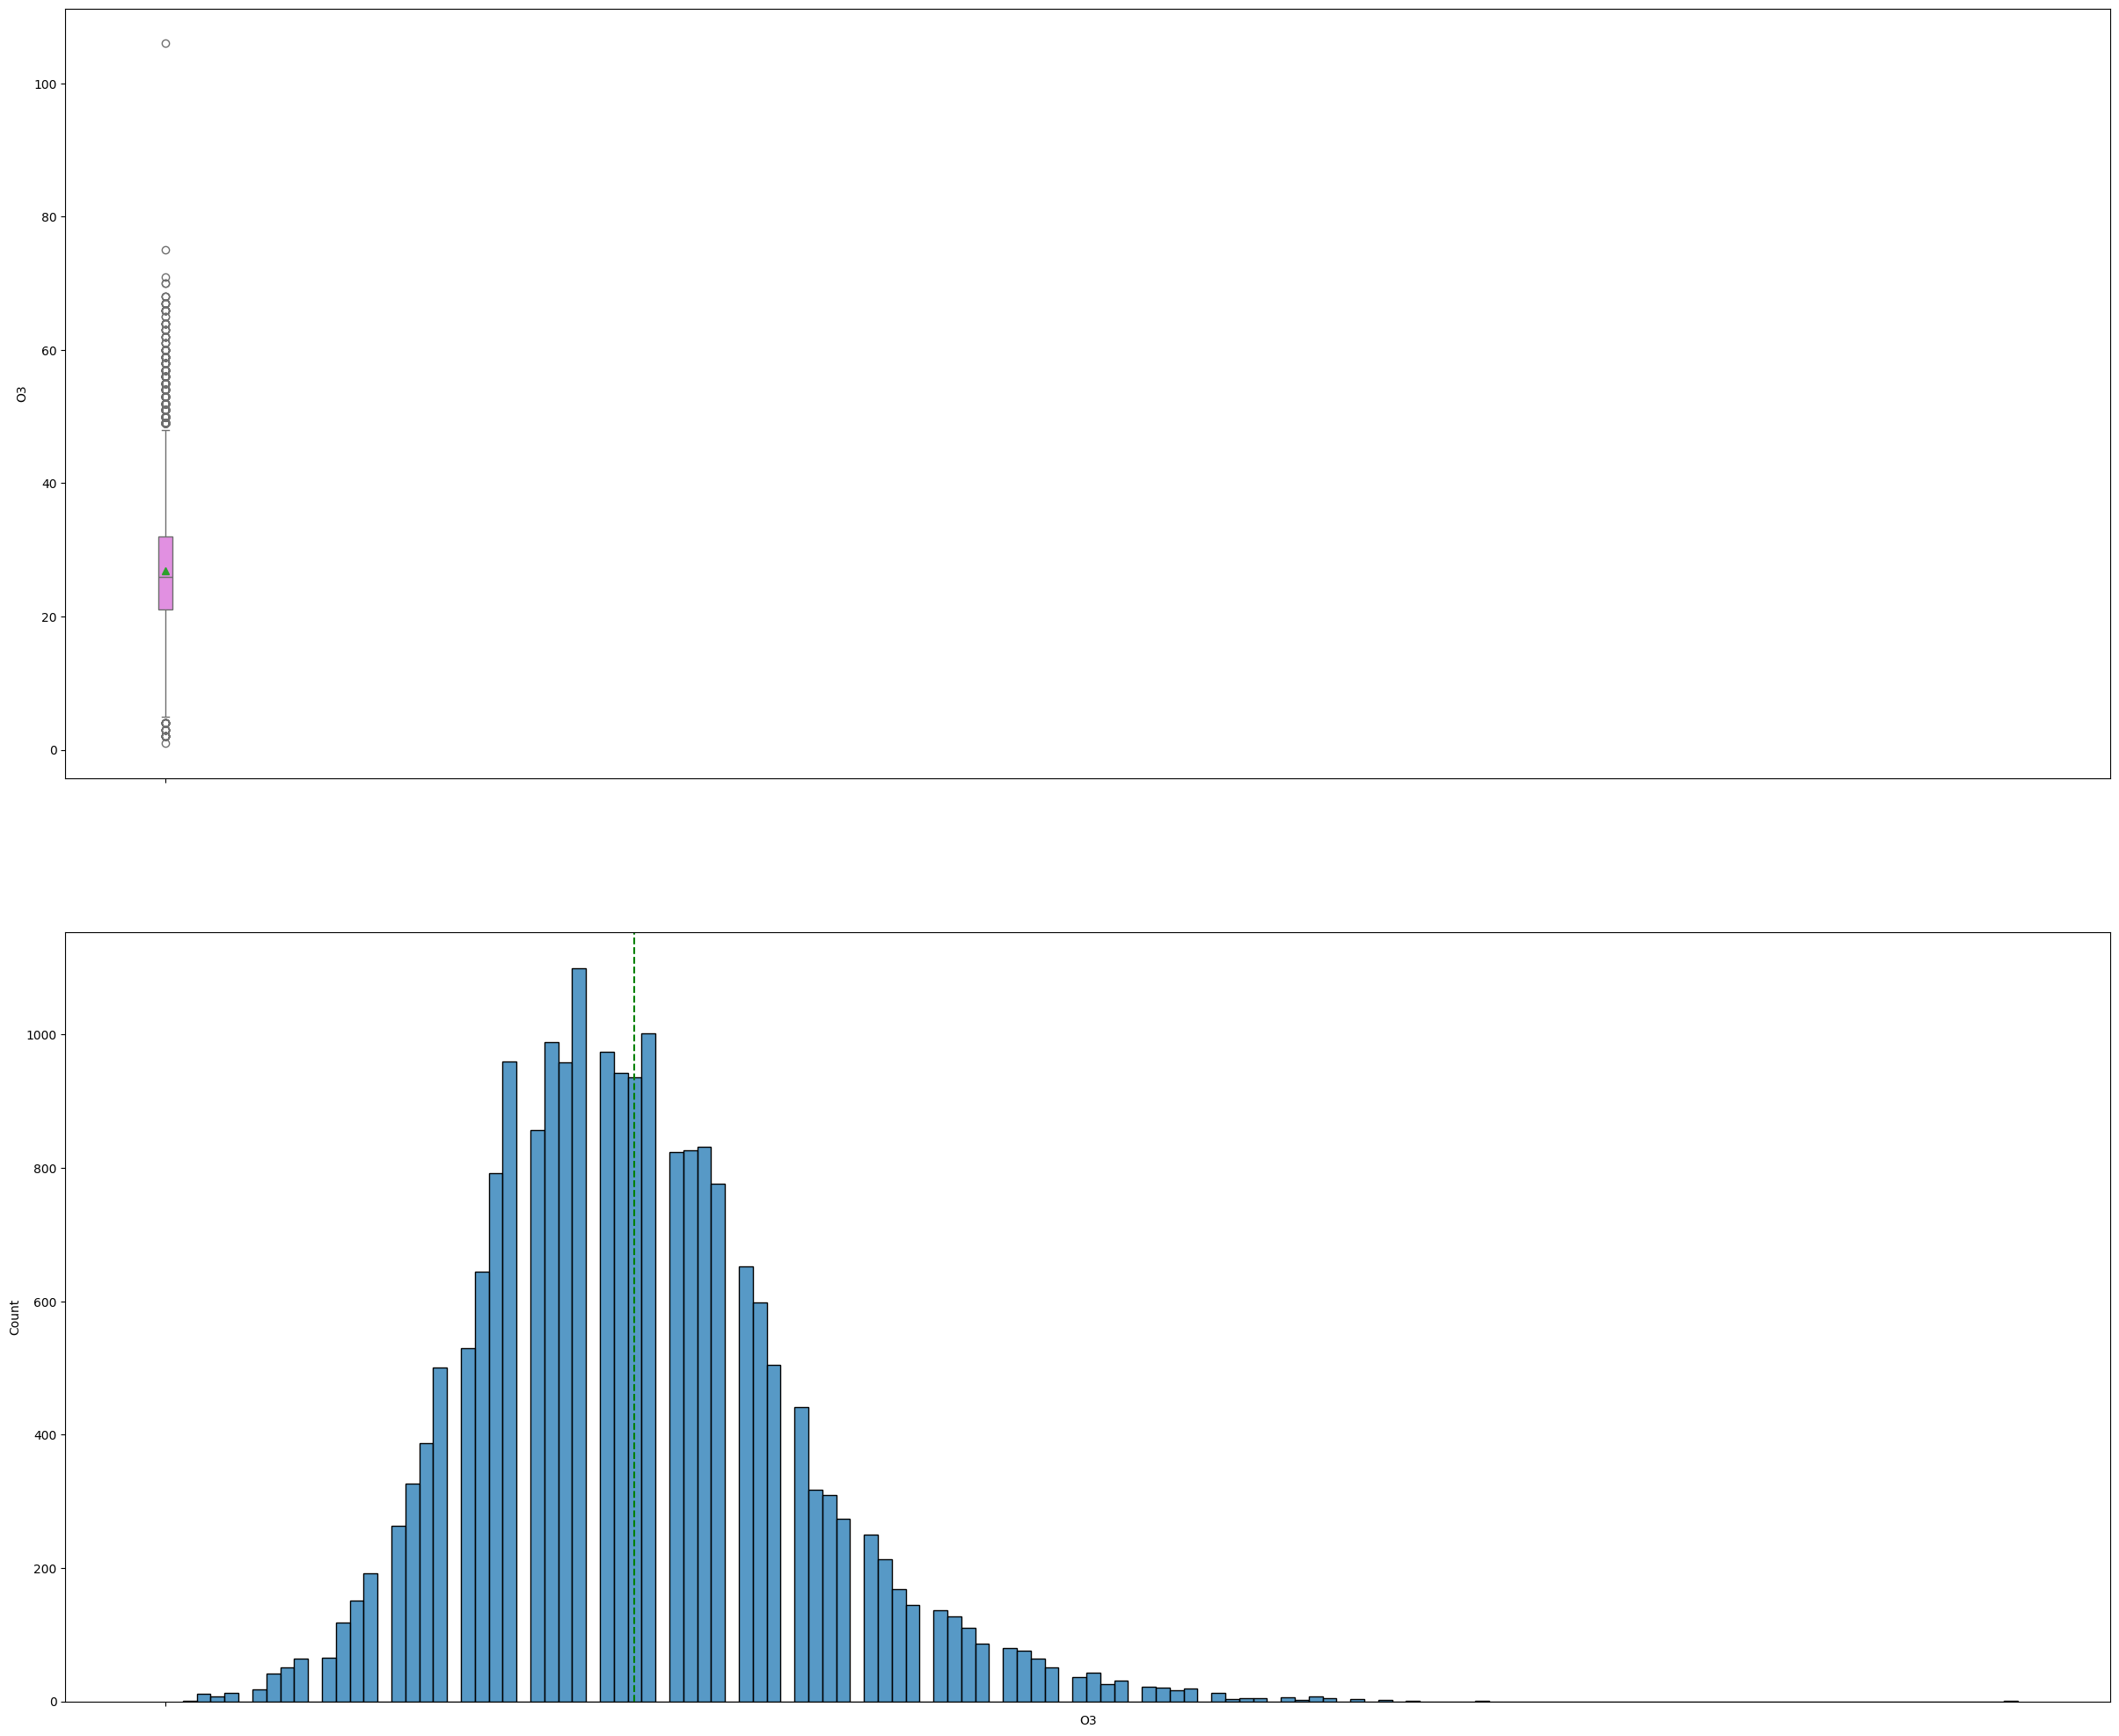

In [1222]:
histogram_boxplot(df['O3'])

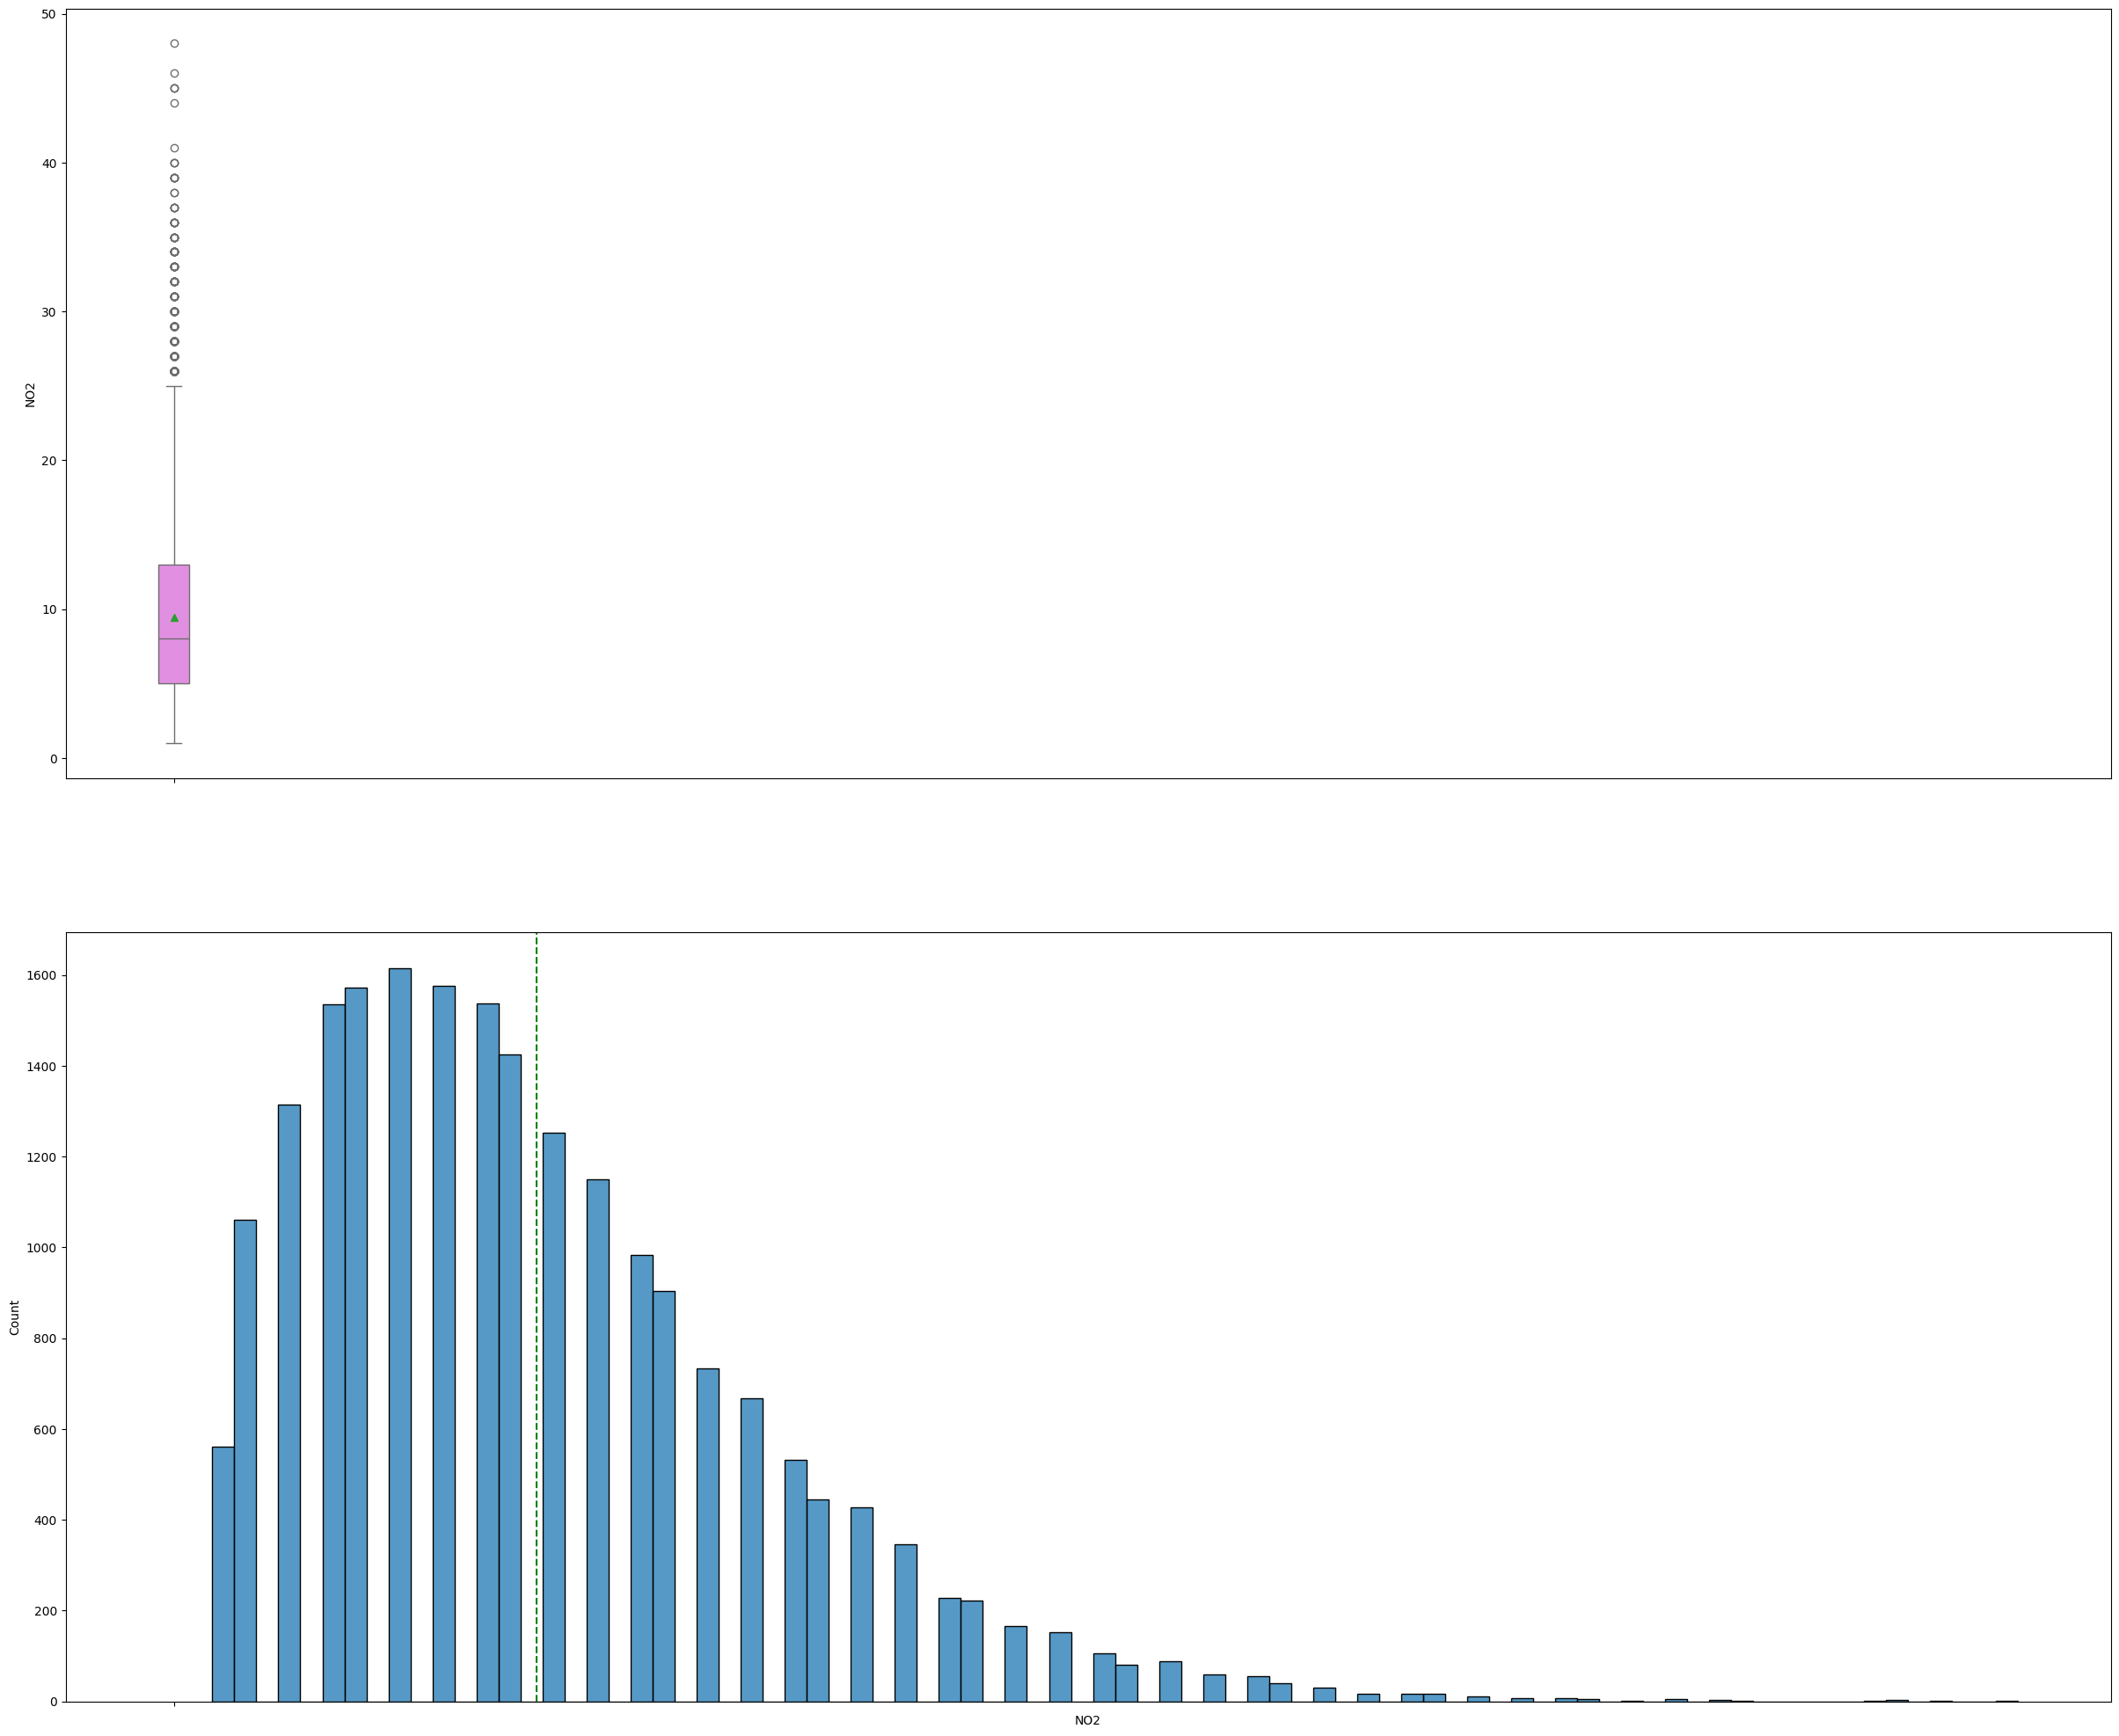

In [1223]:
histogram_boxplot(df['NO2'])

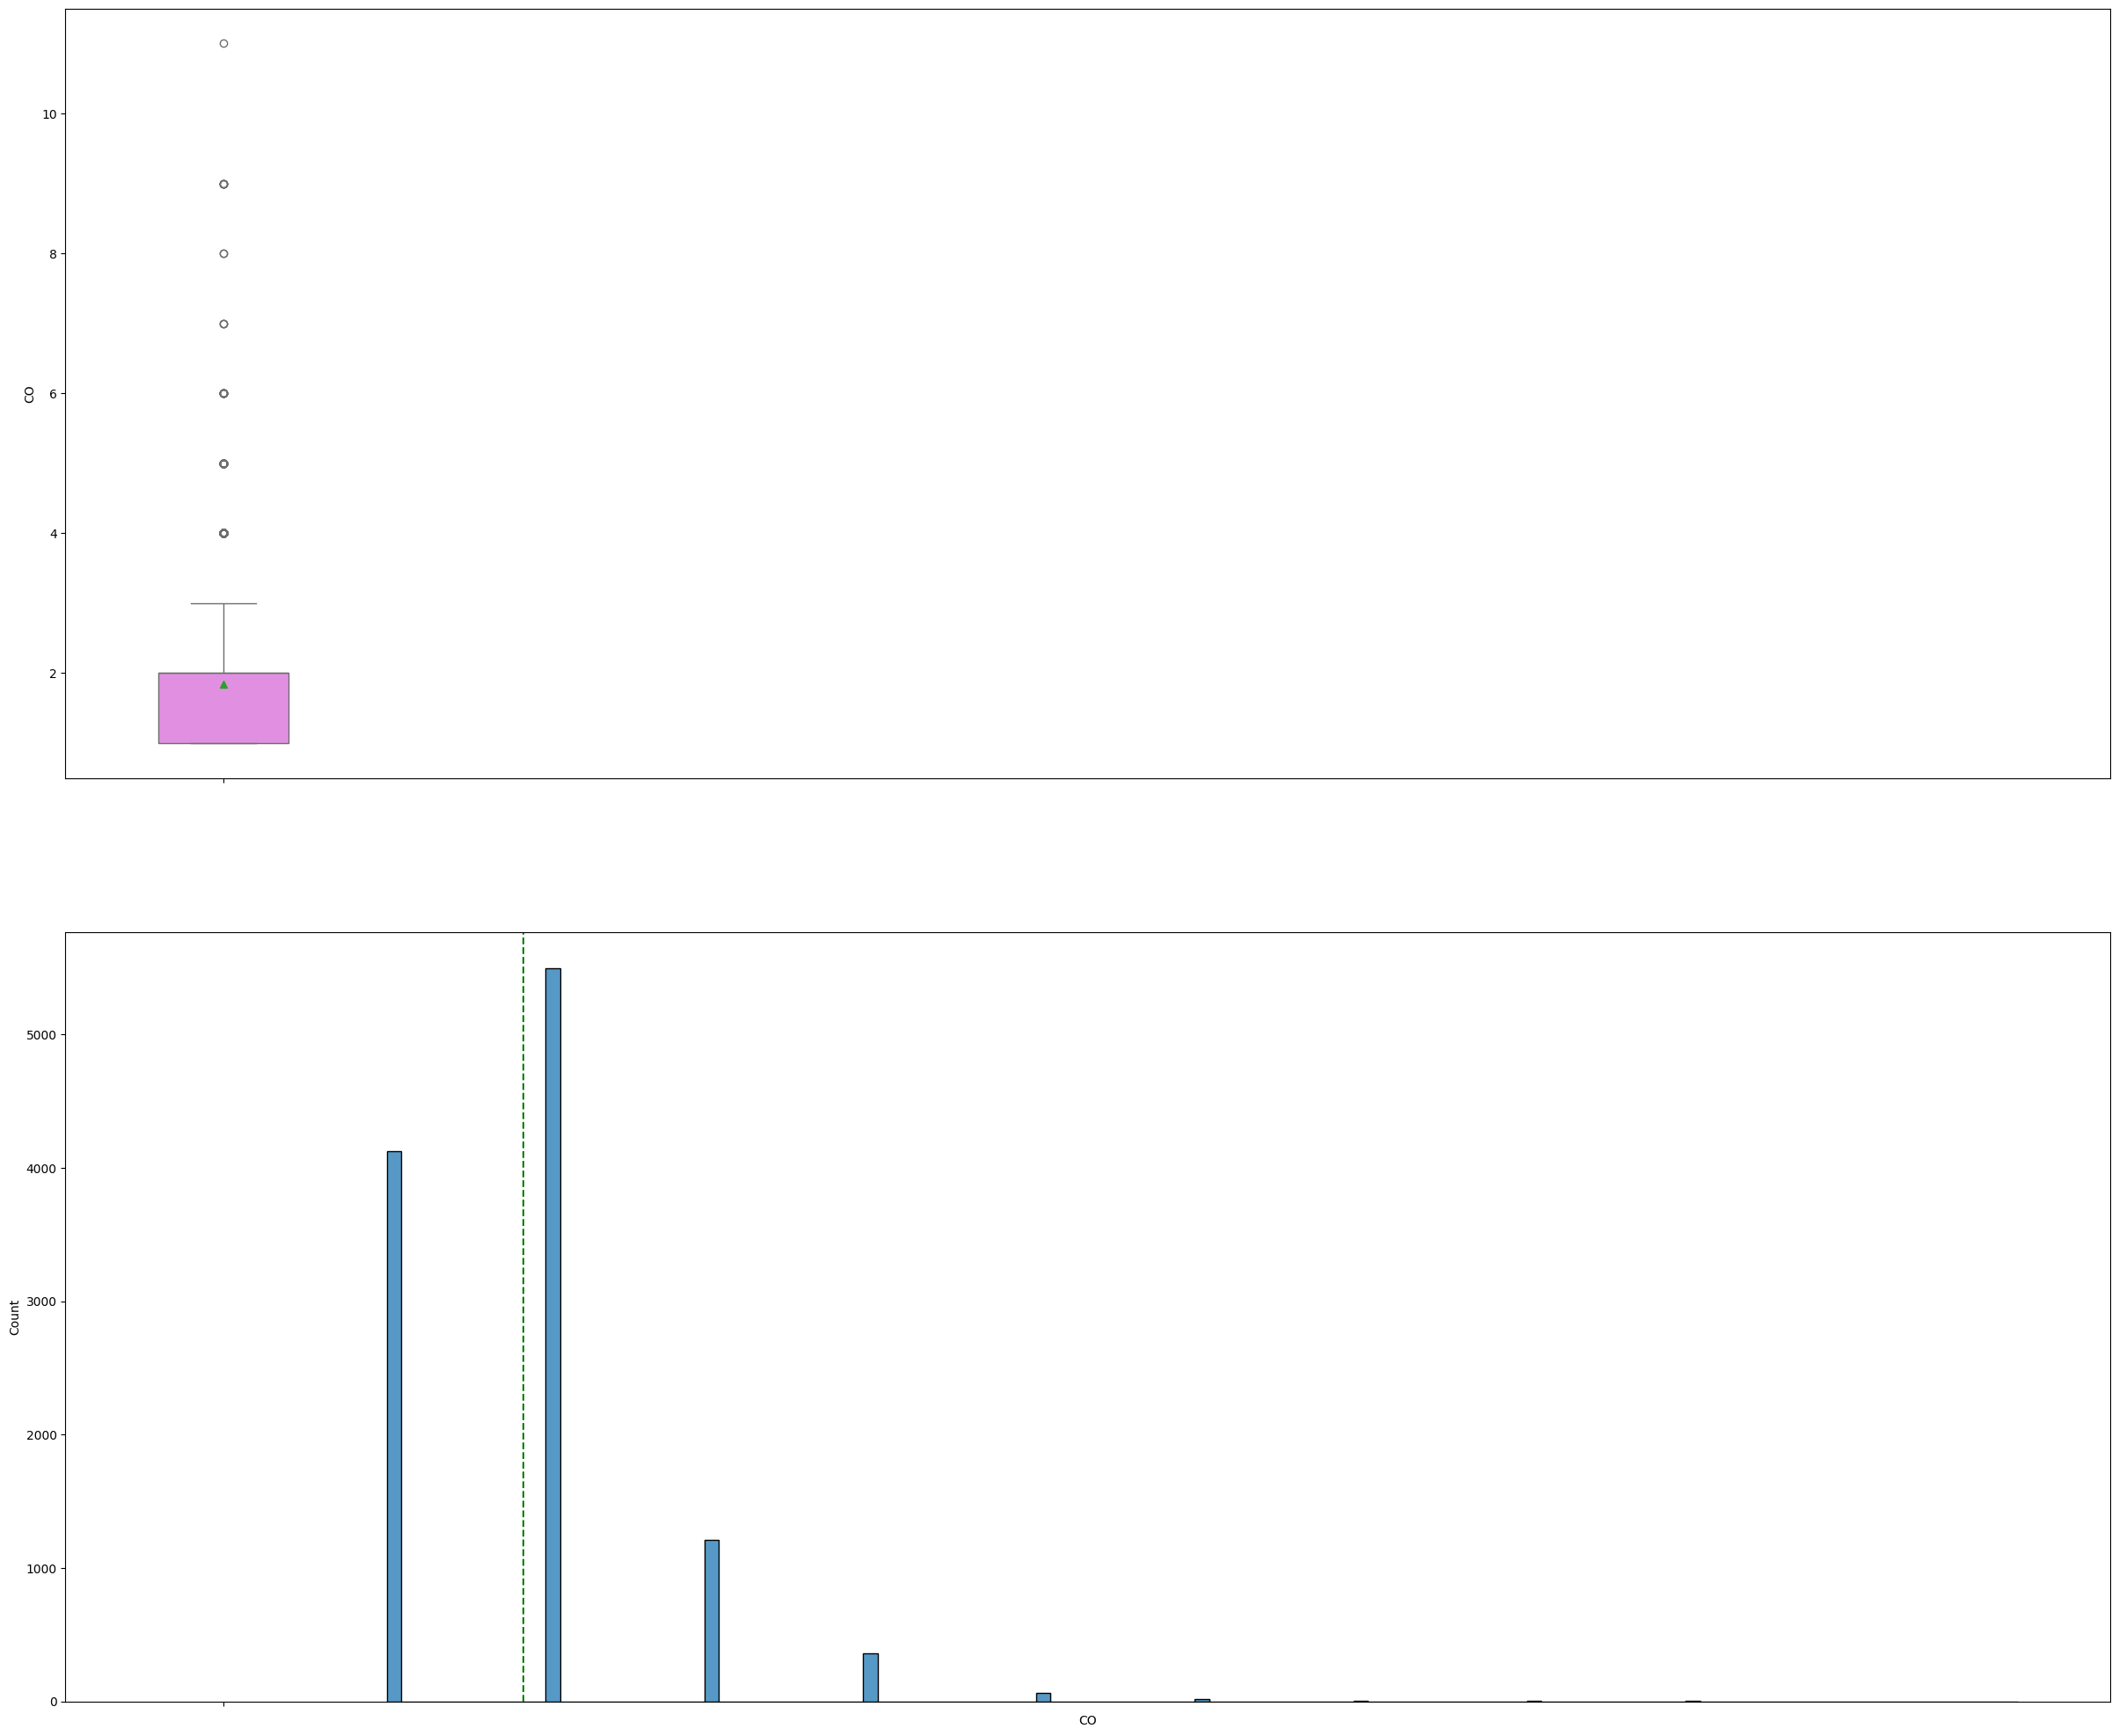

In [1224]:
histogram_boxplot(df['CO'])

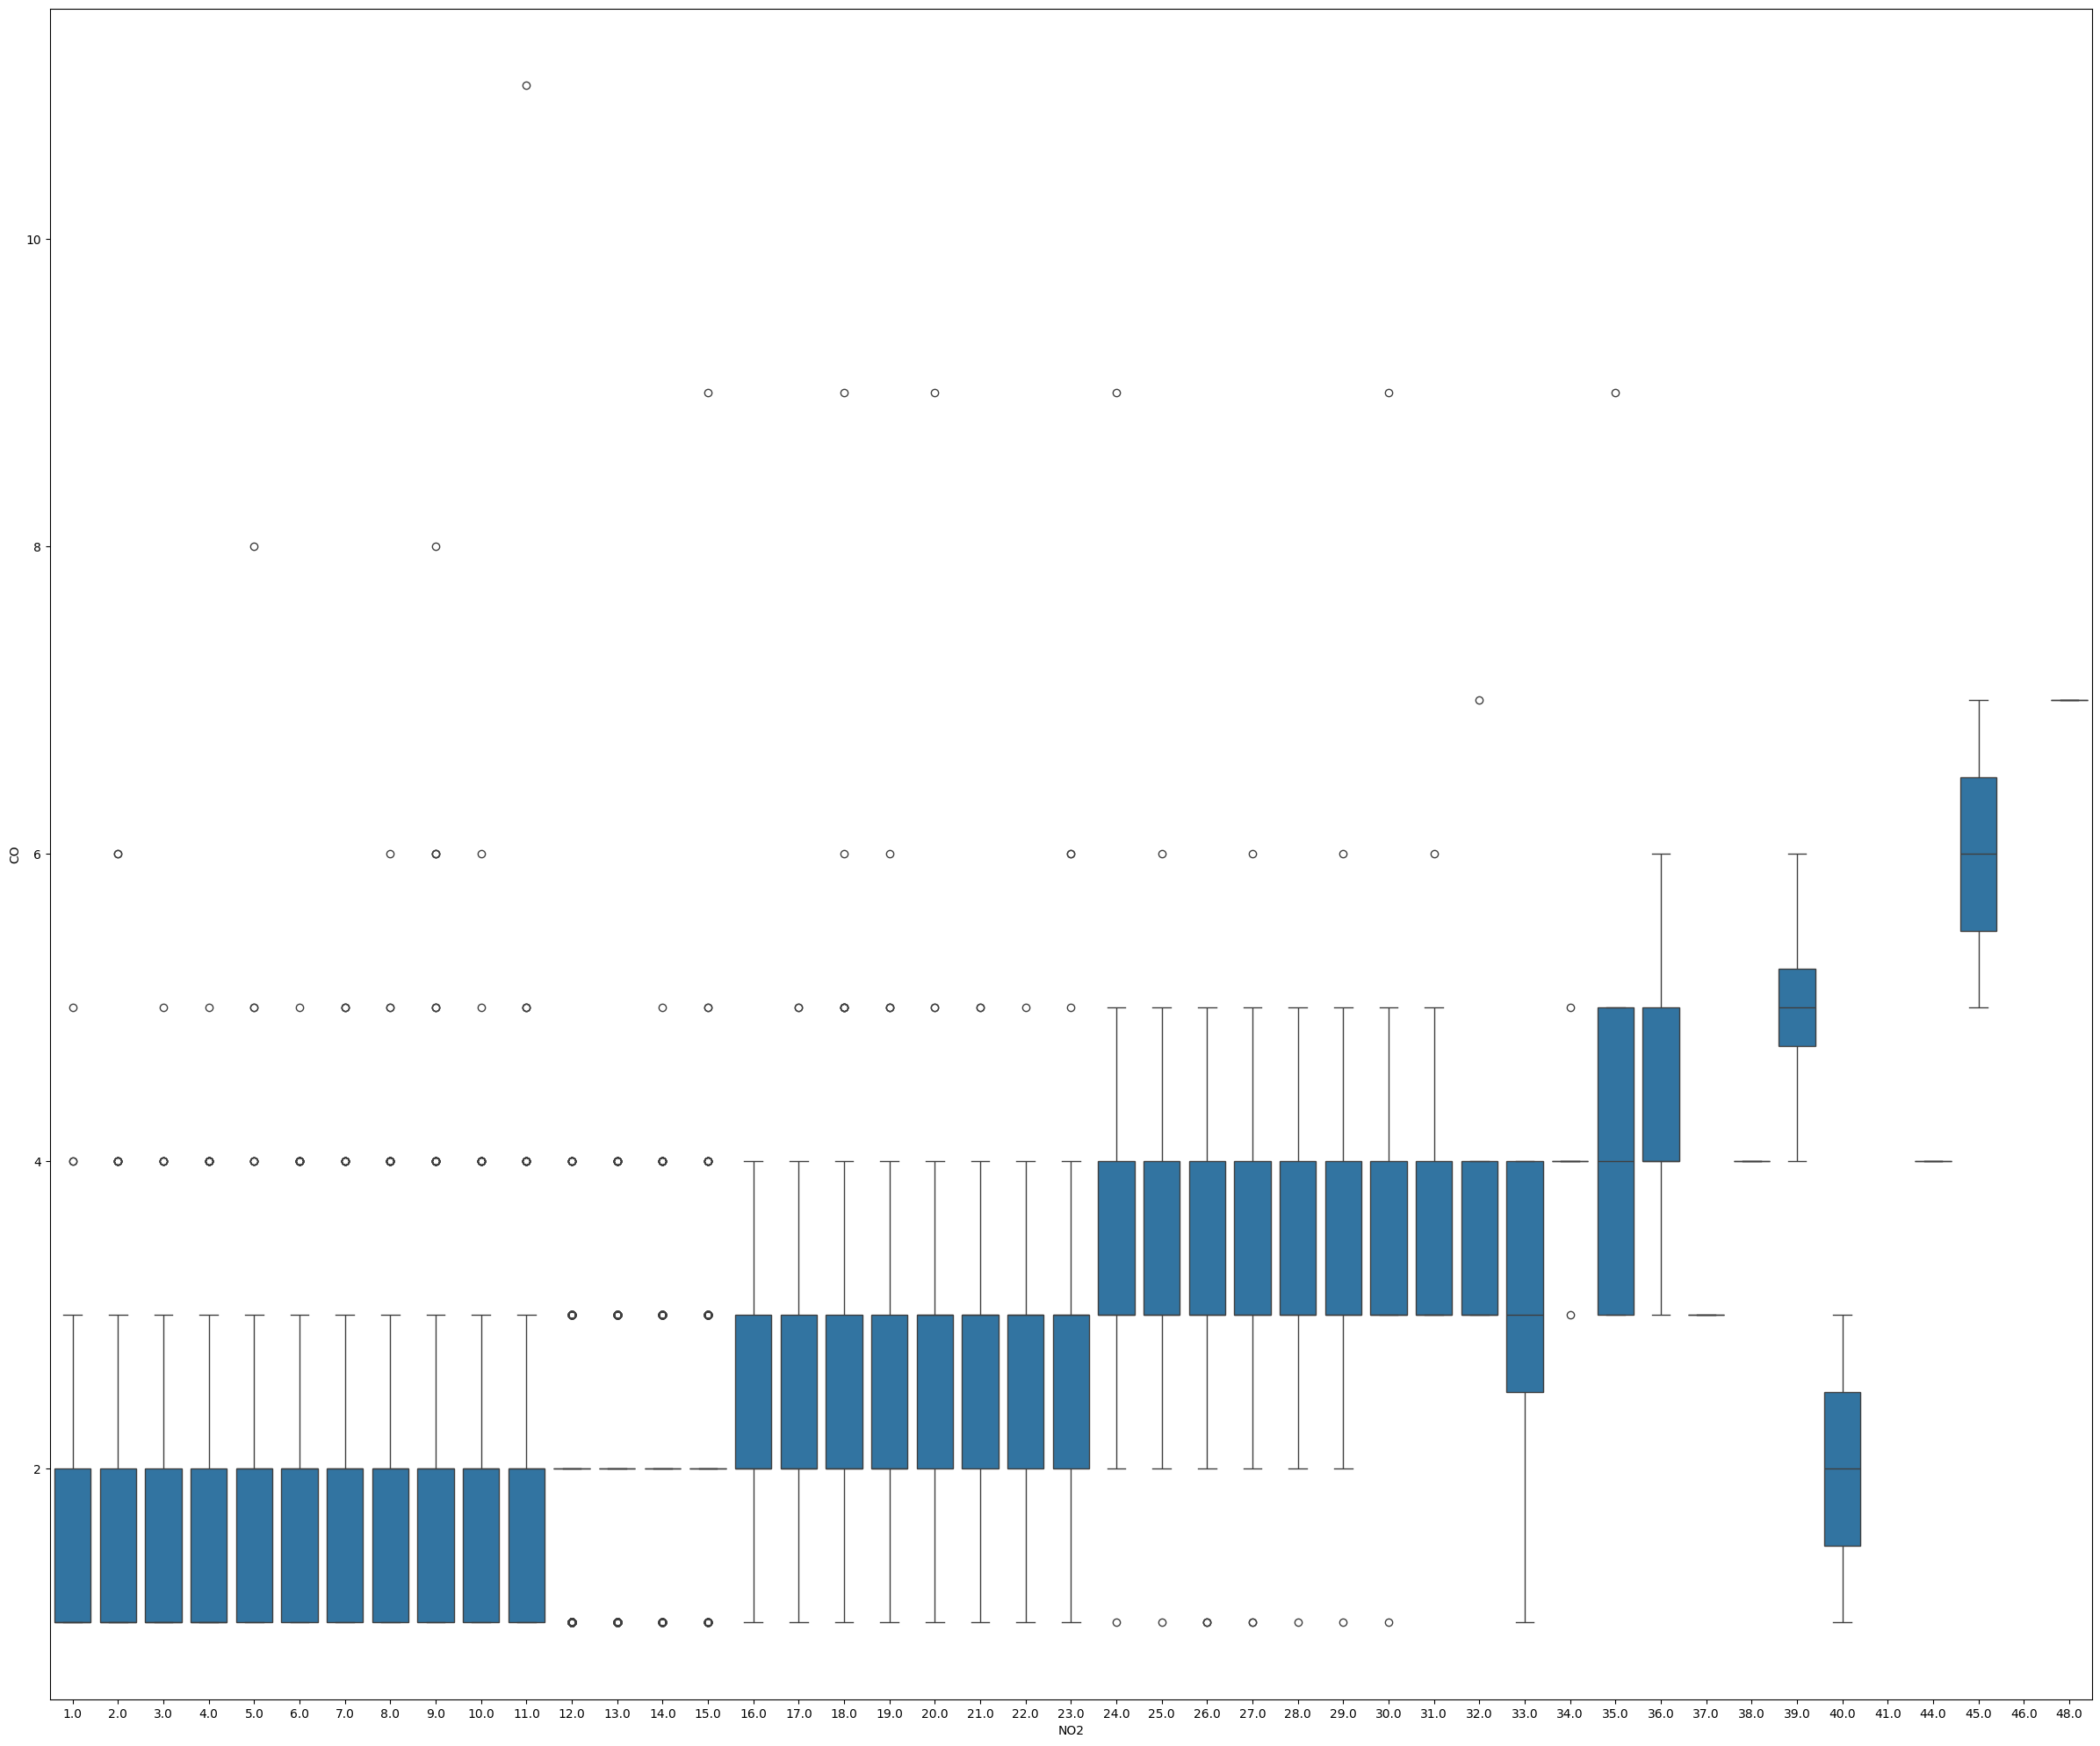

In [1225]:
plt.figure(figsize=(30,25))
sns.boxplot(x='NO2', y='CO', data=df)
plt.show()

In [1226]:
# Calculate the mode of the 'PM25' column
mode_value = df['PM25'].mode().iloc[0]

# Fill empty rows in the 'PM25' column with the mode value
df['PM25'].fillna(mode_value, inplace=True)

print(df)

             Date            City  PM25    O3   NO2  SO2   CO
0      2023-10-02   Toronto-North  36.0  40.0  11.0  1.0  3.0
1      2023-10-03   Toronto-North  38.0  49.0  19.0  1.0  1.0
2      2023-10-04   Toronto-North  54.0  39.0  13.0  1.0  1.0
3      2023-10-05   Toronto-North  57.0  35.0   8.0  1.0  1.0
4      2023-10-06   Toronto-North  46.0  30.0   7.0  1.0  1.0
...           ...             ...   ...   ...   ...  ...  ...
21121  2015-07-18  Toronto- West   23.0  34.0   8.0  1.0  2.0
21122  2015-01-01  Toronto- West   23.0  18.0   8.0  2.0  NaN
21123  2015-01-17  Toronto- West   23.0  19.0  25.0  2.0  3.0
21124  2015-03-11  Toronto- West   23.0  25.0  20.0  2.0  2.0
21125  2014-01-01  Toronto- West   23.0  21.0  12.0  1.0  1.0

[21126 rows x 7 columns]


In [1227]:
# Calculate the mode of the 'O3' column
mode_value = df['O3'].mode().iloc[0]

# Fill empty rows in the 'O3' column with the mode value
df['O3'].fillna(mode_value, inplace=True)

print(df)

             Date            City  PM25    O3   NO2  SO2   CO
0      2023-10-02   Toronto-North  36.0  40.0  11.0  1.0  3.0
1      2023-10-03   Toronto-North  38.0  49.0  19.0  1.0  1.0
2      2023-10-04   Toronto-North  54.0  39.0  13.0  1.0  1.0
3      2023-10-05   Toronto-North  57.0  35.0   8.0  1.0  1.0
4      2023-10-06   Toronto-North  46.0  30.0   7.0  1.0  1.0
...           ...             ...   ...   ...   ...  ...  ...
21121  2015-07-18  Toronto- West   23.0  34.0   8.0  1.0  2.0
21122  2015-01-01  Toronto- West   23.0  18.0   8.0  2.0  NaN
21123  2015-01-17  Toronto- West   23.0  19.0  25.0  2.0  3.0
21124  2015-03-11  Toronto- West   23.0  25.0  20.0  2.0  2.0
21125  2014-01-01  Toronto- West   23.0  21.0  12.0  1.0  1.0

[21126 rows x 7 columns]


In [1228]:
# Calculate the mode of the 'NO2' column
mode_value = df['NO2'].mode().iloc[0]

# Fill empty rows in the 'NO2' column with the mode value
df['NO2'].fillna(mode_value, inplace=True)

print(df)

             Date            City  PM25    O3   NO2  SO2   CO
0      2023-10-02   Toronto-North  36.0  40.0  11.0  1.0  3.0
1      2023-10-03   Toronto-North  38.0  49.0  19.0  1.0  1.0
2      2023-10-04   Toronto-North  54.0  39.0  13.0  1.0  1.0
3      2023-10-05   Toronto-North  57.0  35.0   8.0  1.0  1.0
4      2023-10-06   Toronto-North  46.0  30.0   7.0  1.0  1.0
...           ...             ...   ...   ...   ...  ...  ...
21121  2015-07-18  Toronto- West   23.0  34.0   8.0  1.0  2.0
21122  2015-01-01  Toronto- West   23.0  18.0   8.0  2.0  NaN
21123  2015-01-17  Toronto- West   23.0  19.0  25.0  2.0  3.0
21124  2015-03-11  Toronto- West   23.0  25.0  20.0  2.0  2.0
21125  2014-01-01  Toronto- West   23.0  21.0  12.0  1.0  1.0

[21126 rows x 7 columns]


In [1229]:
# Calculate the mode of the 'SO2' column
mode_value = df['SO2'].mode().iloc[0]

# Fill empty rows in the 'SO2' column with the mode value
df['SO2'].fillna(mode_value, inplace=True)

print(df)

             Date            City  PM25    O3   NO2  SO2   CO
0      2023-10-02   Toronto-North  36.0  40.0  11.0  1.0  3.0
1      2023-10-03   Toronto-North  38.0  49.0  19.0  1.0  1.0
2      2023-10-04   Toronto-North  54.0  39.0  13.0  1.0  1.0
3      2023-10-05   Toronto-North  57.0  35.0   8.0  1.0  1.0
4      2023-10-06   Toronto-North  46.0  30.0   7.0  1.0  1.0
...           ...             ...   ...   ...   ...  ...  ...
21121  2015-07-18  Toronto- West   23.0  34.0   8.0  1.0  2.0
21122  2015-01-01  Toronto- West   23.0  18.0   8.0  2.0  NaN
21123  2015-01-17  Toronto- West   23.0  19.0  25.0  2.0  3.0
21124  2015-03-11  Toronto- West   23.0  25.0  20.0  2.0  2.0
21125  2014-01-01  Toronto- West   23.0  21.0  12.0  1.0  1.0

[21126 rows x 7 columns]


In [1230]:
# Calculate the mode of the 'CO' column
mode_value = df['CO'].mode().iloc[0]

# Fill empty rows in the 'CO' column with the mode value
df['CO'].fillna(mode_value, inplace=True)

print(df)

             Date            City  PM25    O3   NO2  SO2   CO
0      2023-10-02   Toronto-North  36.0  40.0  11.0  1.0  3.0
1      2023-10-03   Toronto-North  38.0  49.0  19.0  1.0  1.0
2      2023-10-04   Toronto-North  54.0  39.0  13.0  1.0  1.0
3      2023-10-05   Toronto-North  57.0  35.0   8.0  1.0  1.0
4      2023-10-06   Toronto-North  46.0  30.0   7.0  1.0  1.0
...           ...             ...   ...   ...   ...  ...  ...
21121  2015-07-18  Toronto- West   23.0  34.0   8.0  1.0  2.0
21122  2015-01-01  Toronto- West   23.0  18.0   8.0  2.0  2.0
21123  2015-01-17  Toronto- West   23.0  19.0  25.0  2.0  3.0
21124  2015-03-11  Toronto- West   23.0  25.0  20.0  2.0  2.0
21125  2014-01-01  Toronto- West   23.0  21.0  12.0  1.0  1.0

[21126 rows x 7 columns]


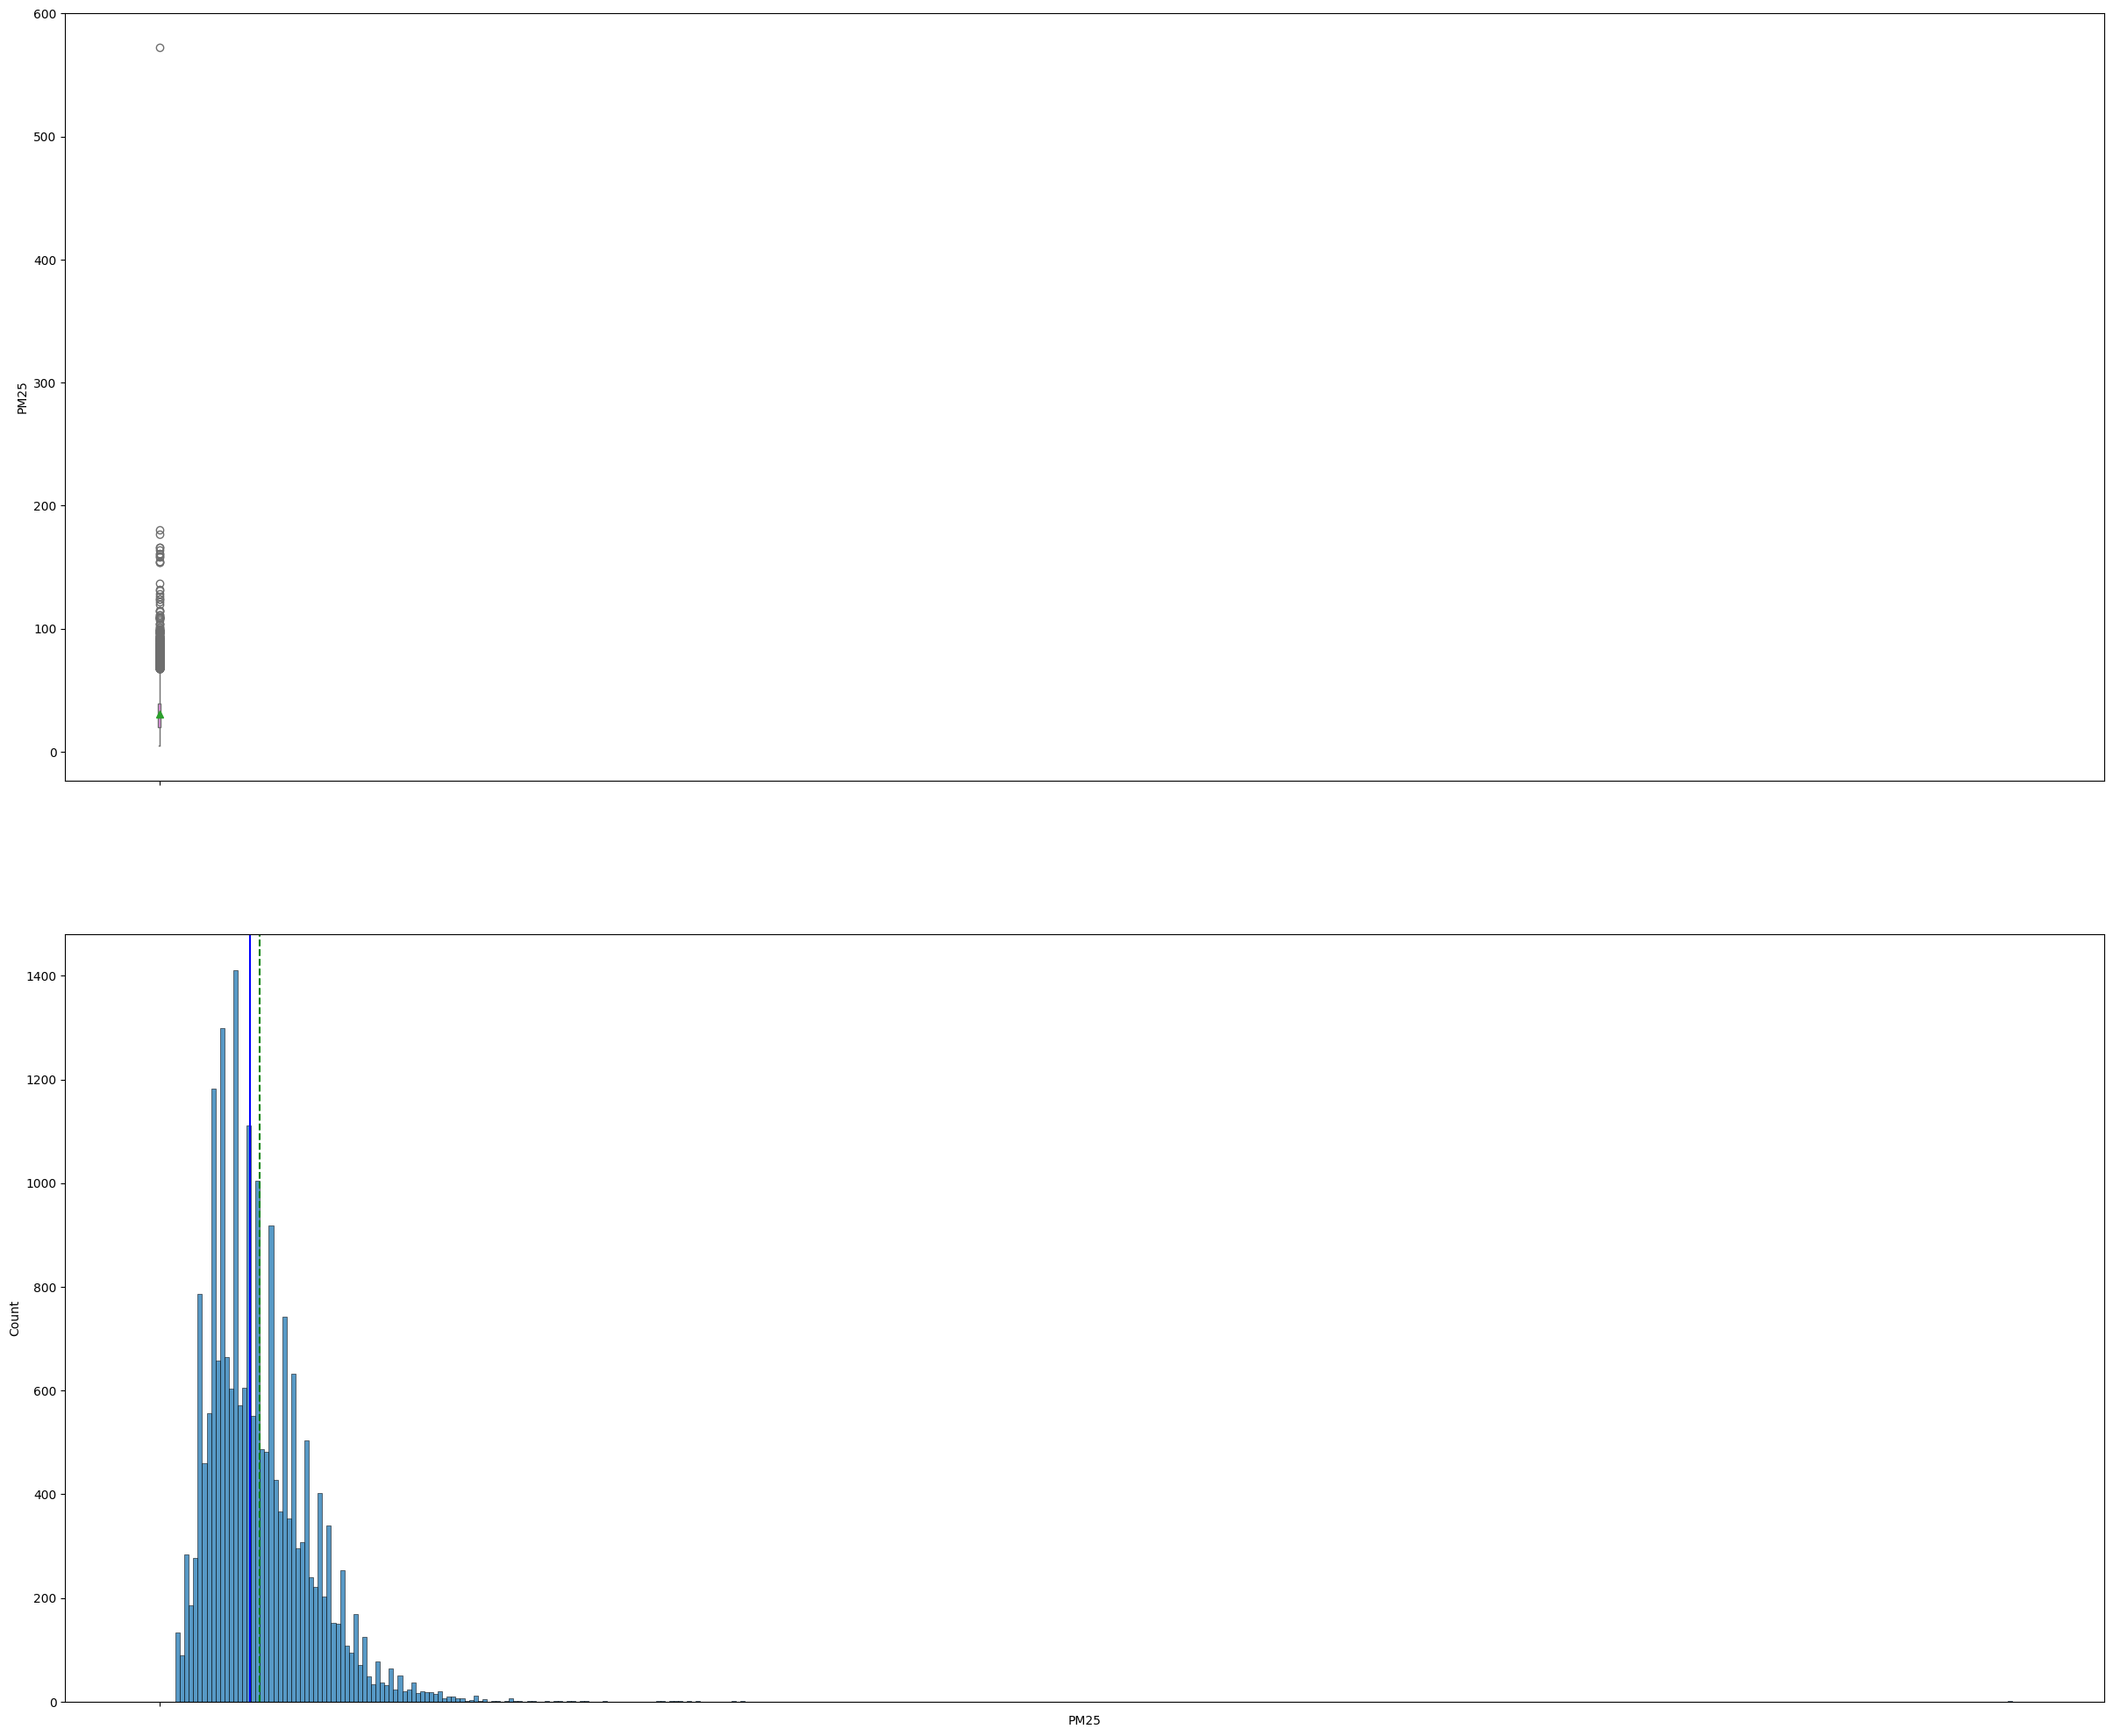

In [1231]:
histogram_boxplot(df['PM25'])

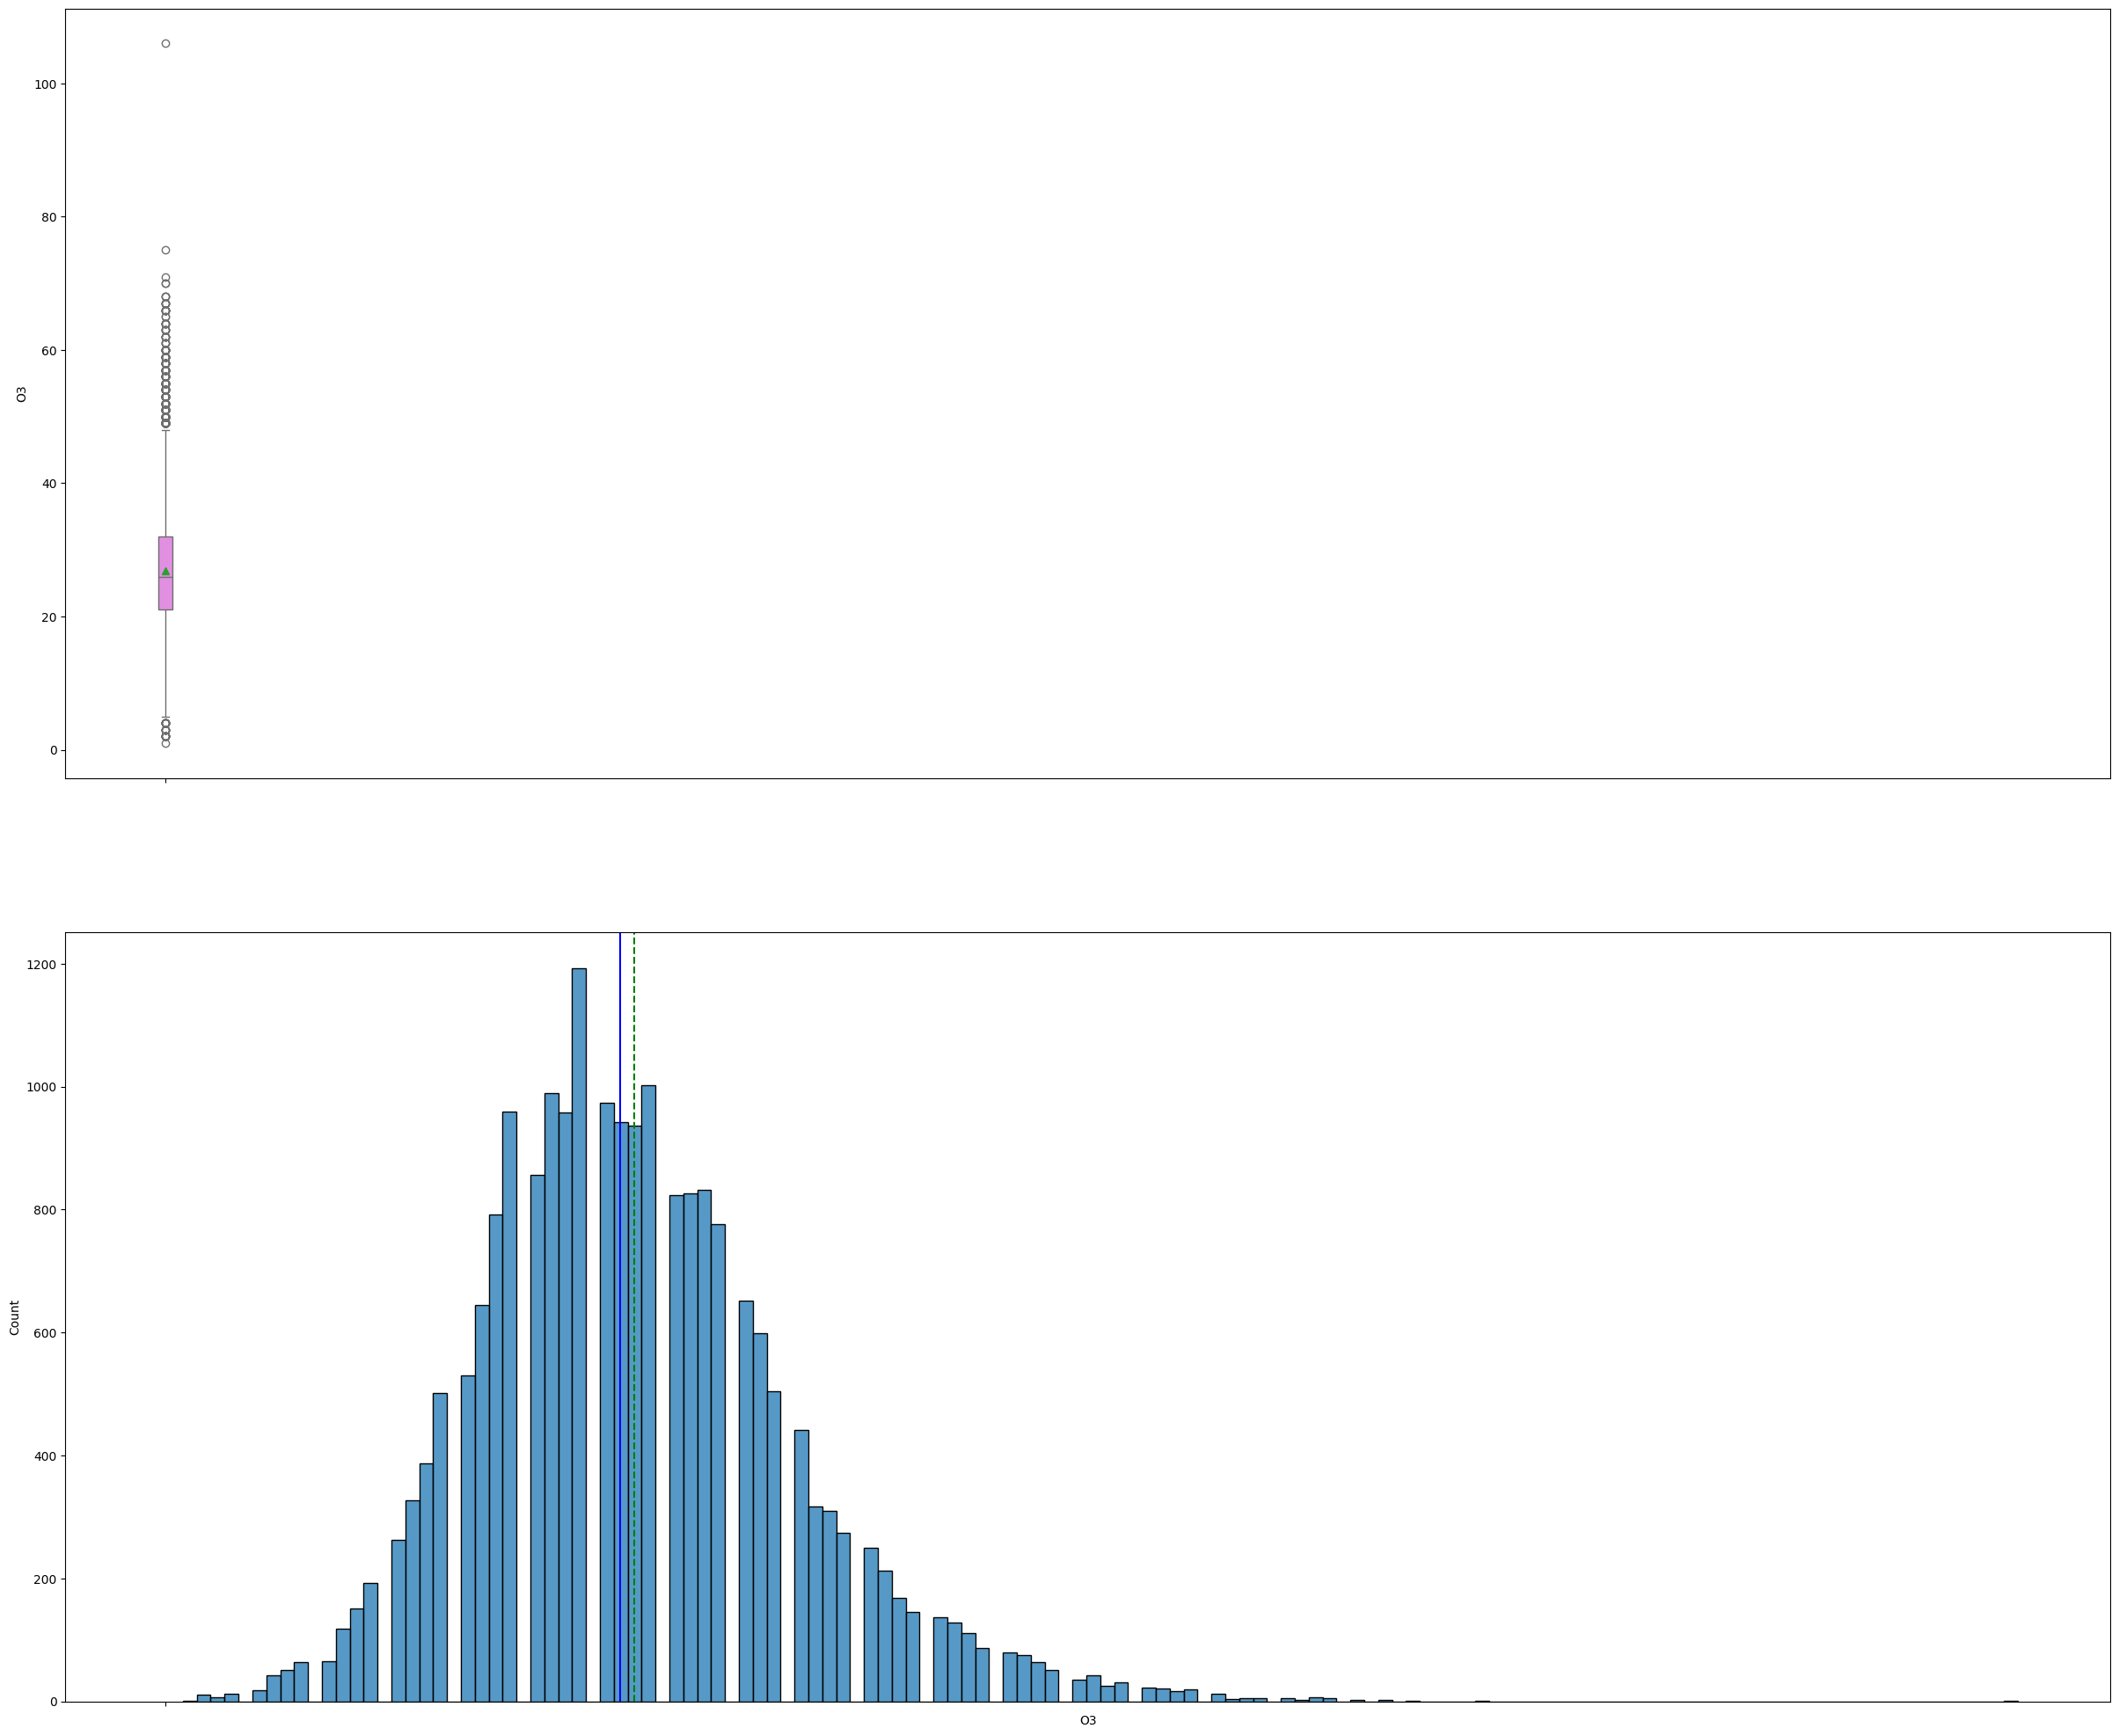

In [1232]:
histogram_boxplot(df['O3'])

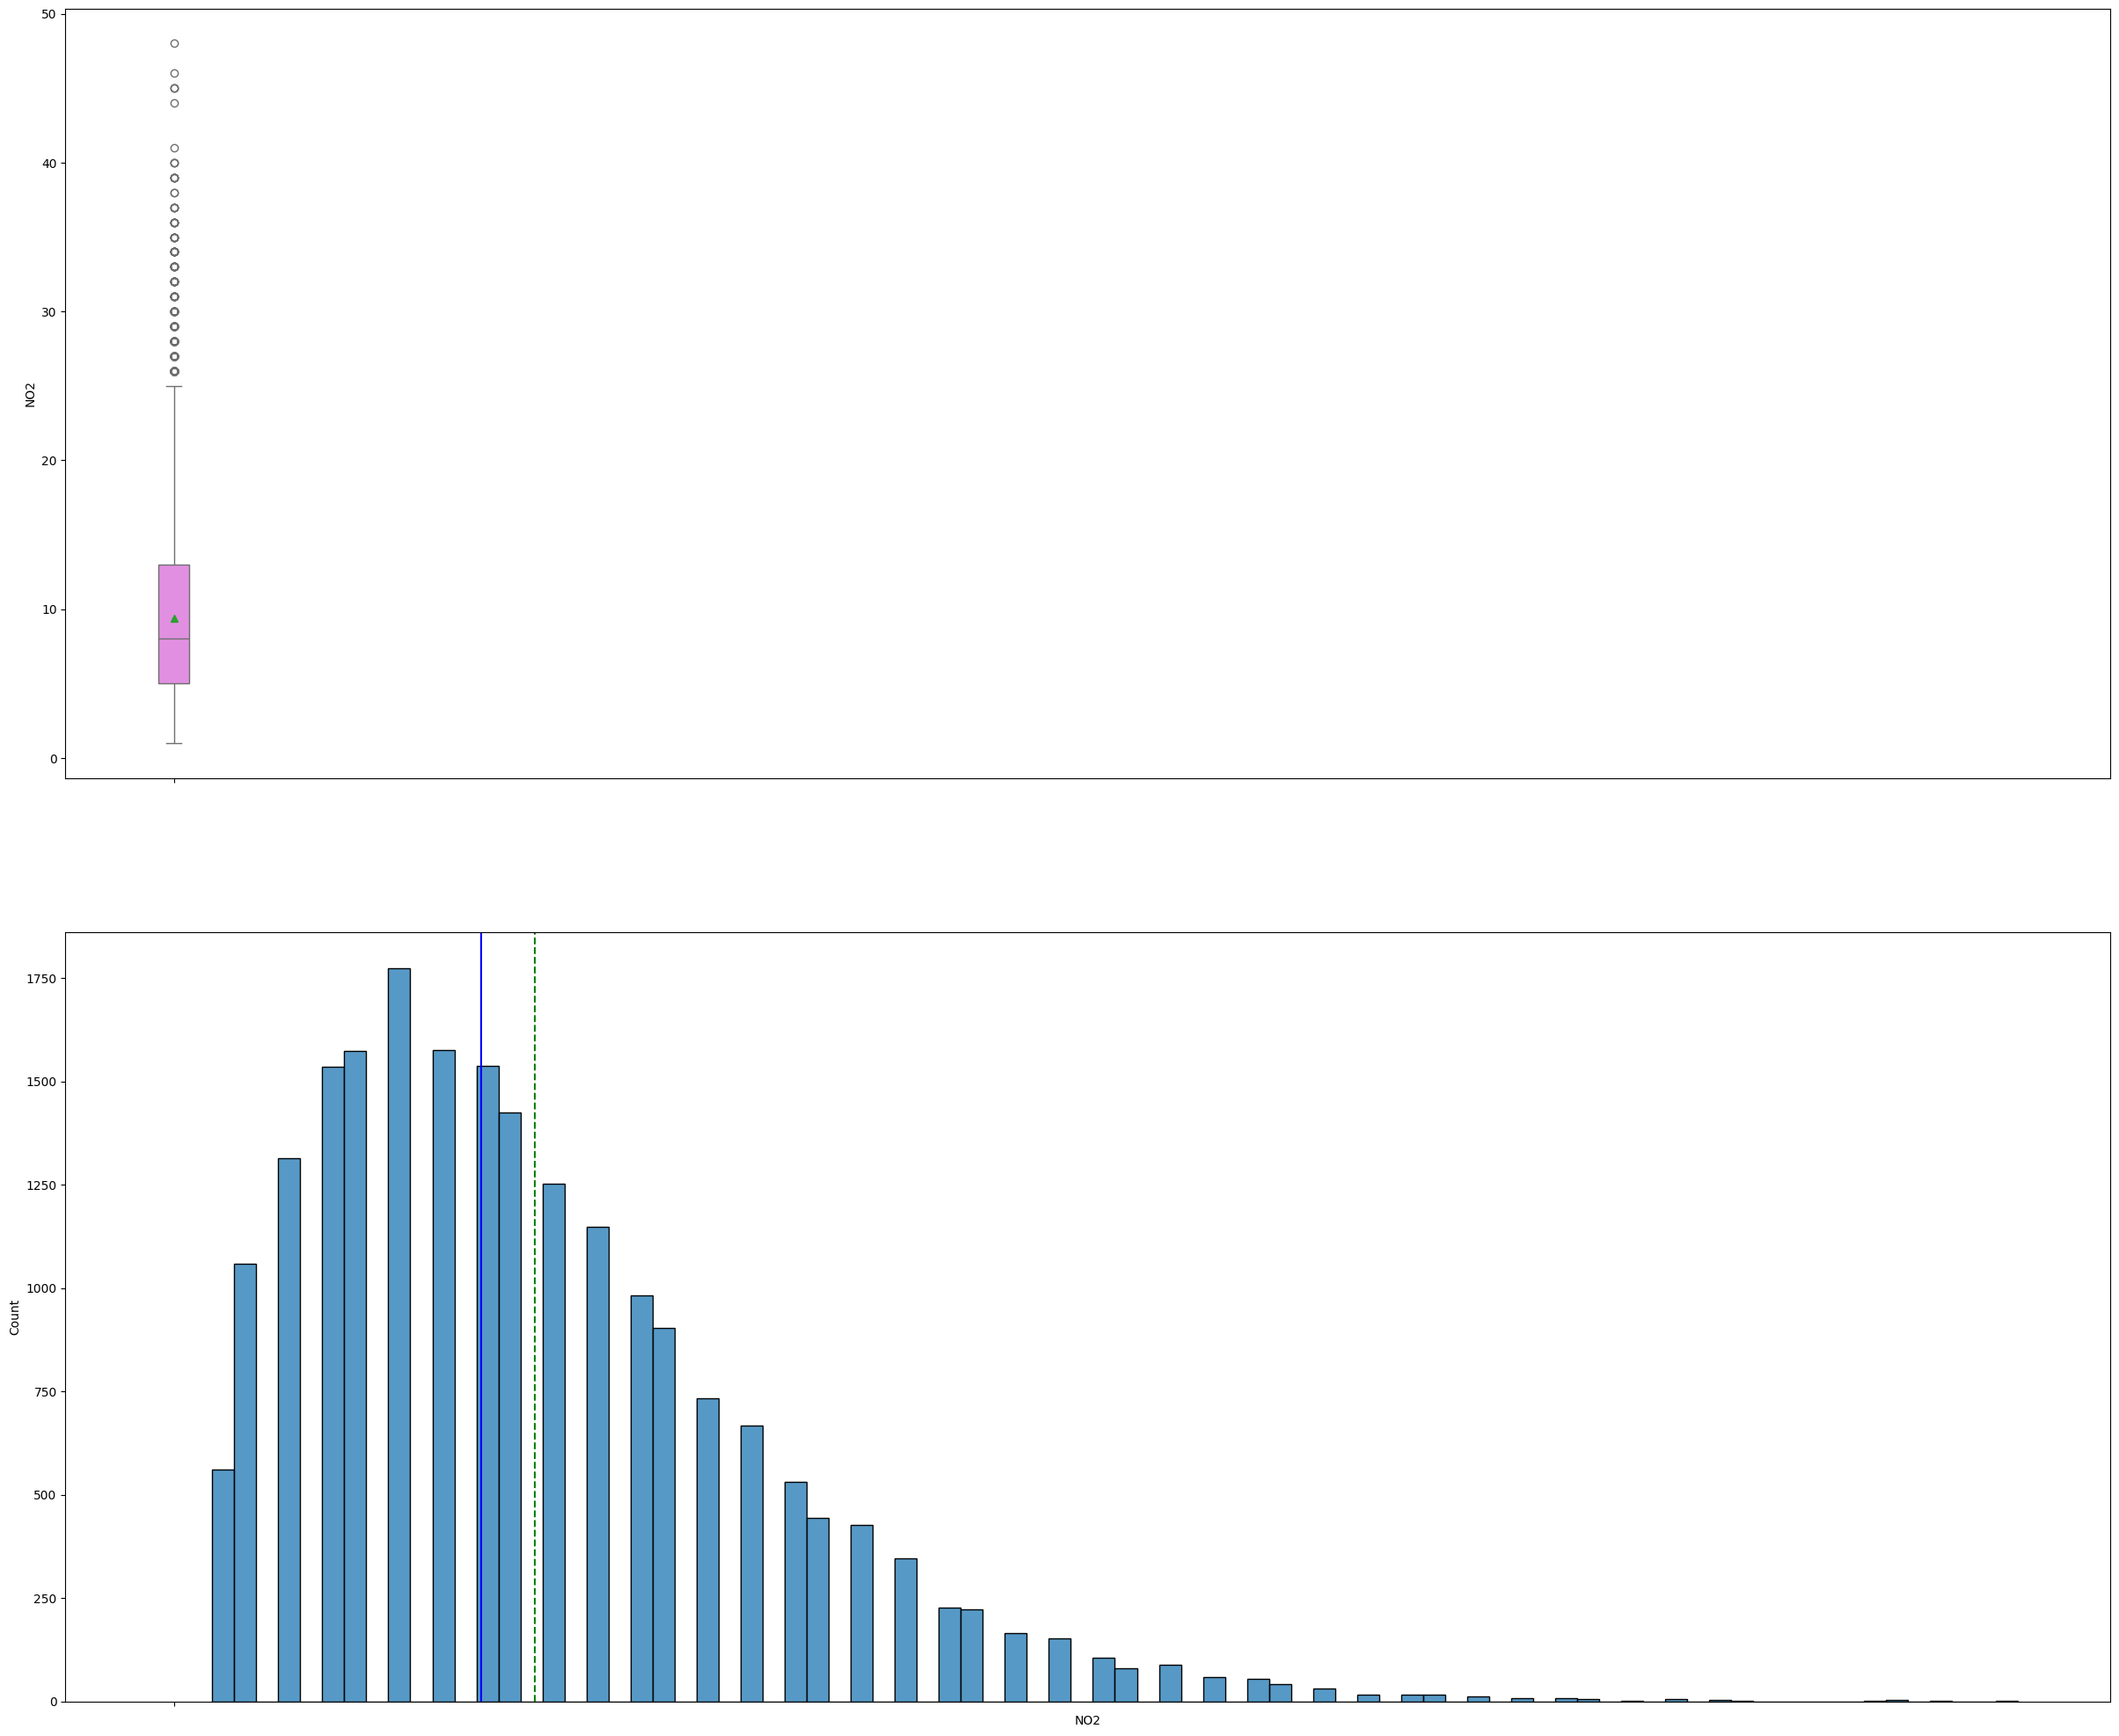

In [1233]:
histogram_boxplot(df['NO2'])

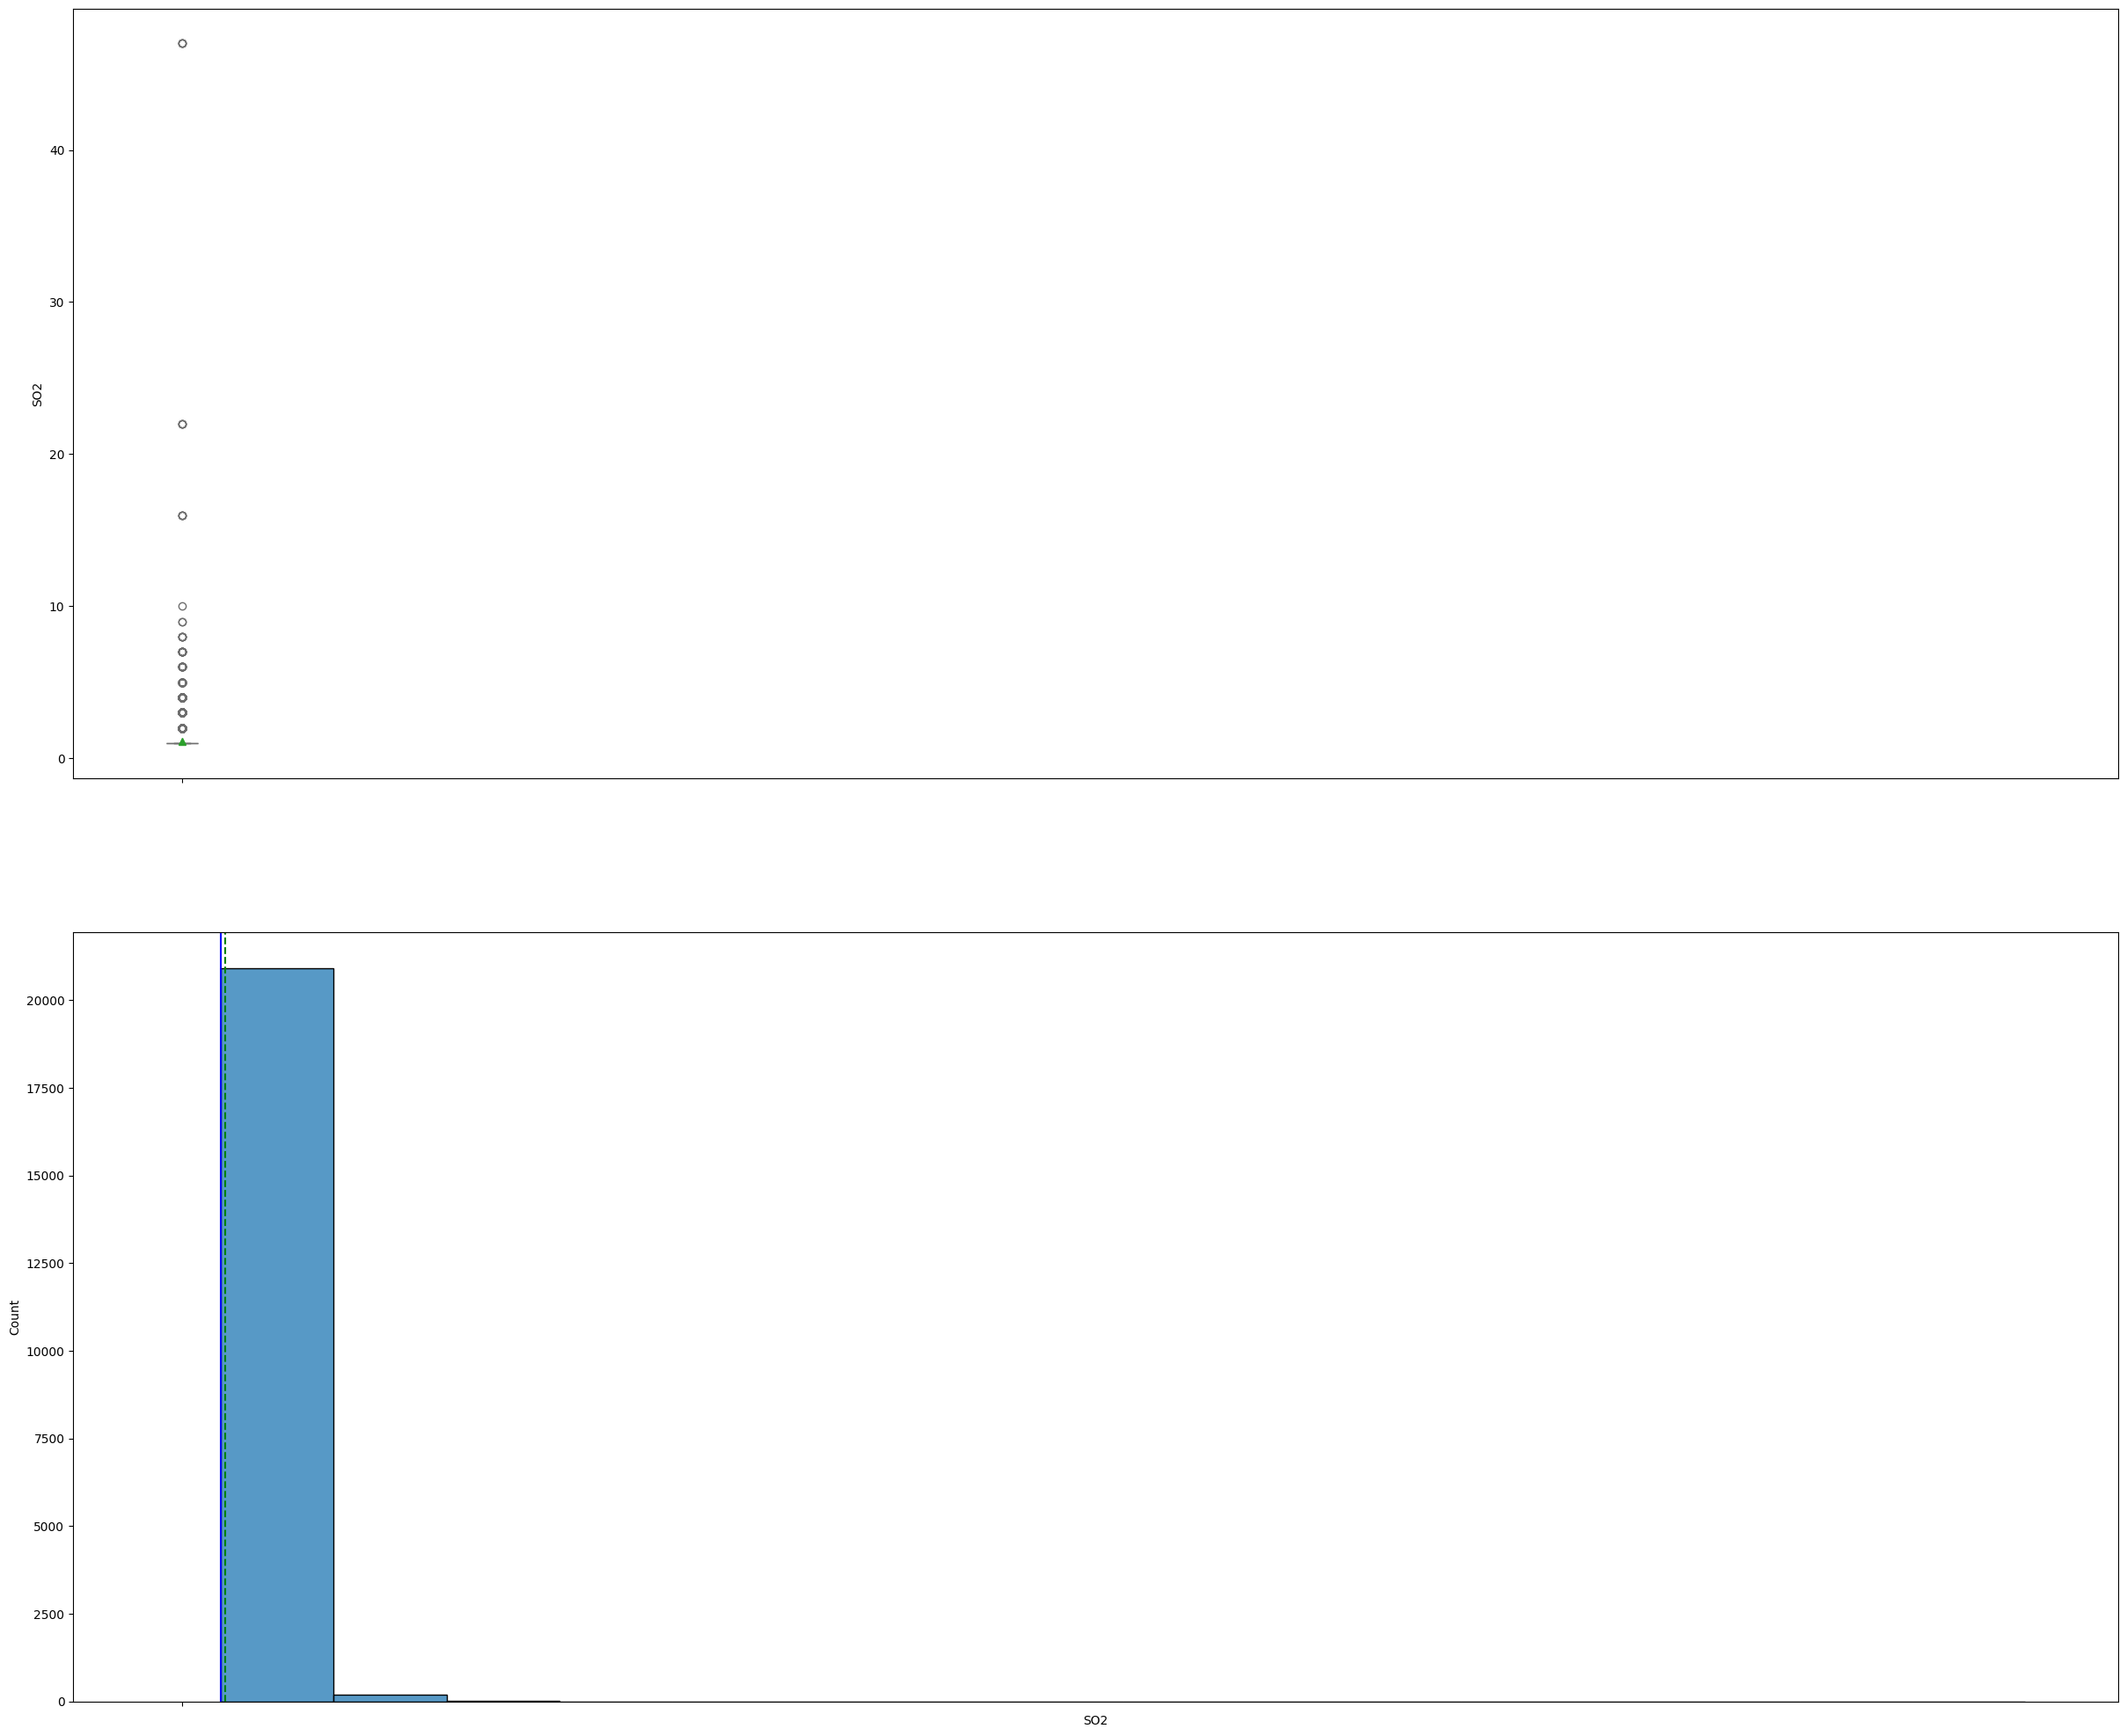

In [1234]:
histogram_boxplot(df['SO2'])

In [1235]:
pip install pandas scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1236]:
# Specify the column for which you want to fix outliers
target_column = 'O3'

# Calculate the mode for the target column
mode = df[target_column].mode()[0]

# Calculate the Z-scores for the target column
z_scores = stats.zscore(df[target_column].dropna())

# Set upper and lower thresholds for outliers
upper_threshold = 40
lower_threshold = 10

# Identify outliers by Z-scores beyond the thresholds
outliers = (z_scores > upper_threshold) | (z_scores < lower_threshold)

# Replace outliers in the target column with the mode
df.loc[df[target_column].dropna().index[outliers], target_column] = mode

# Save the DataFrame with outliers fixed
# Replace 'cleaned_dataset.csv' with the desired output filename
df.to_csv('cleaned_dataset.csv', index=False)

# Print the cleaned DataFrame
print(df)


             Date            City  PM25    O3   NO2  SO2   CO
0      2023-10-02   Toronto-North  36.0  24.0  11.0  1.0  3.0
1      2023-10-03   Toronto-North  38.0  24.0  19.0  1.0  1.0
2      2023-10-04   Toronto-North  54.0  24.0  13.0  1.0  1.0
3      2023-10-05   Toronto-North  57.0  24.0   8.0  1.0  1.0
4      2023-10-06   Toronto-North  46.0  24.0   7.0  1.0  1.0
...           ...             ...   ...   ...   ...  ...  ...
21121  2015-07-18  Toronto- West   23.0  24.0   8.0  1.0  2.0
21122  2015-01-01  Toronto- West   23.0  24.0   8.0  2.0  2.0
21123  2015-01-17  Toronto- West   23.0  24.0  25.0  2.0  3.0
21124  2015-03-11  Toronto- West   23.0  24.0  20.0  2.0  2.0
21125  2014-01-01  Toronto- West   23.0  24.0  12.0  1.0  1.0

[21126 rows x 7 columns]


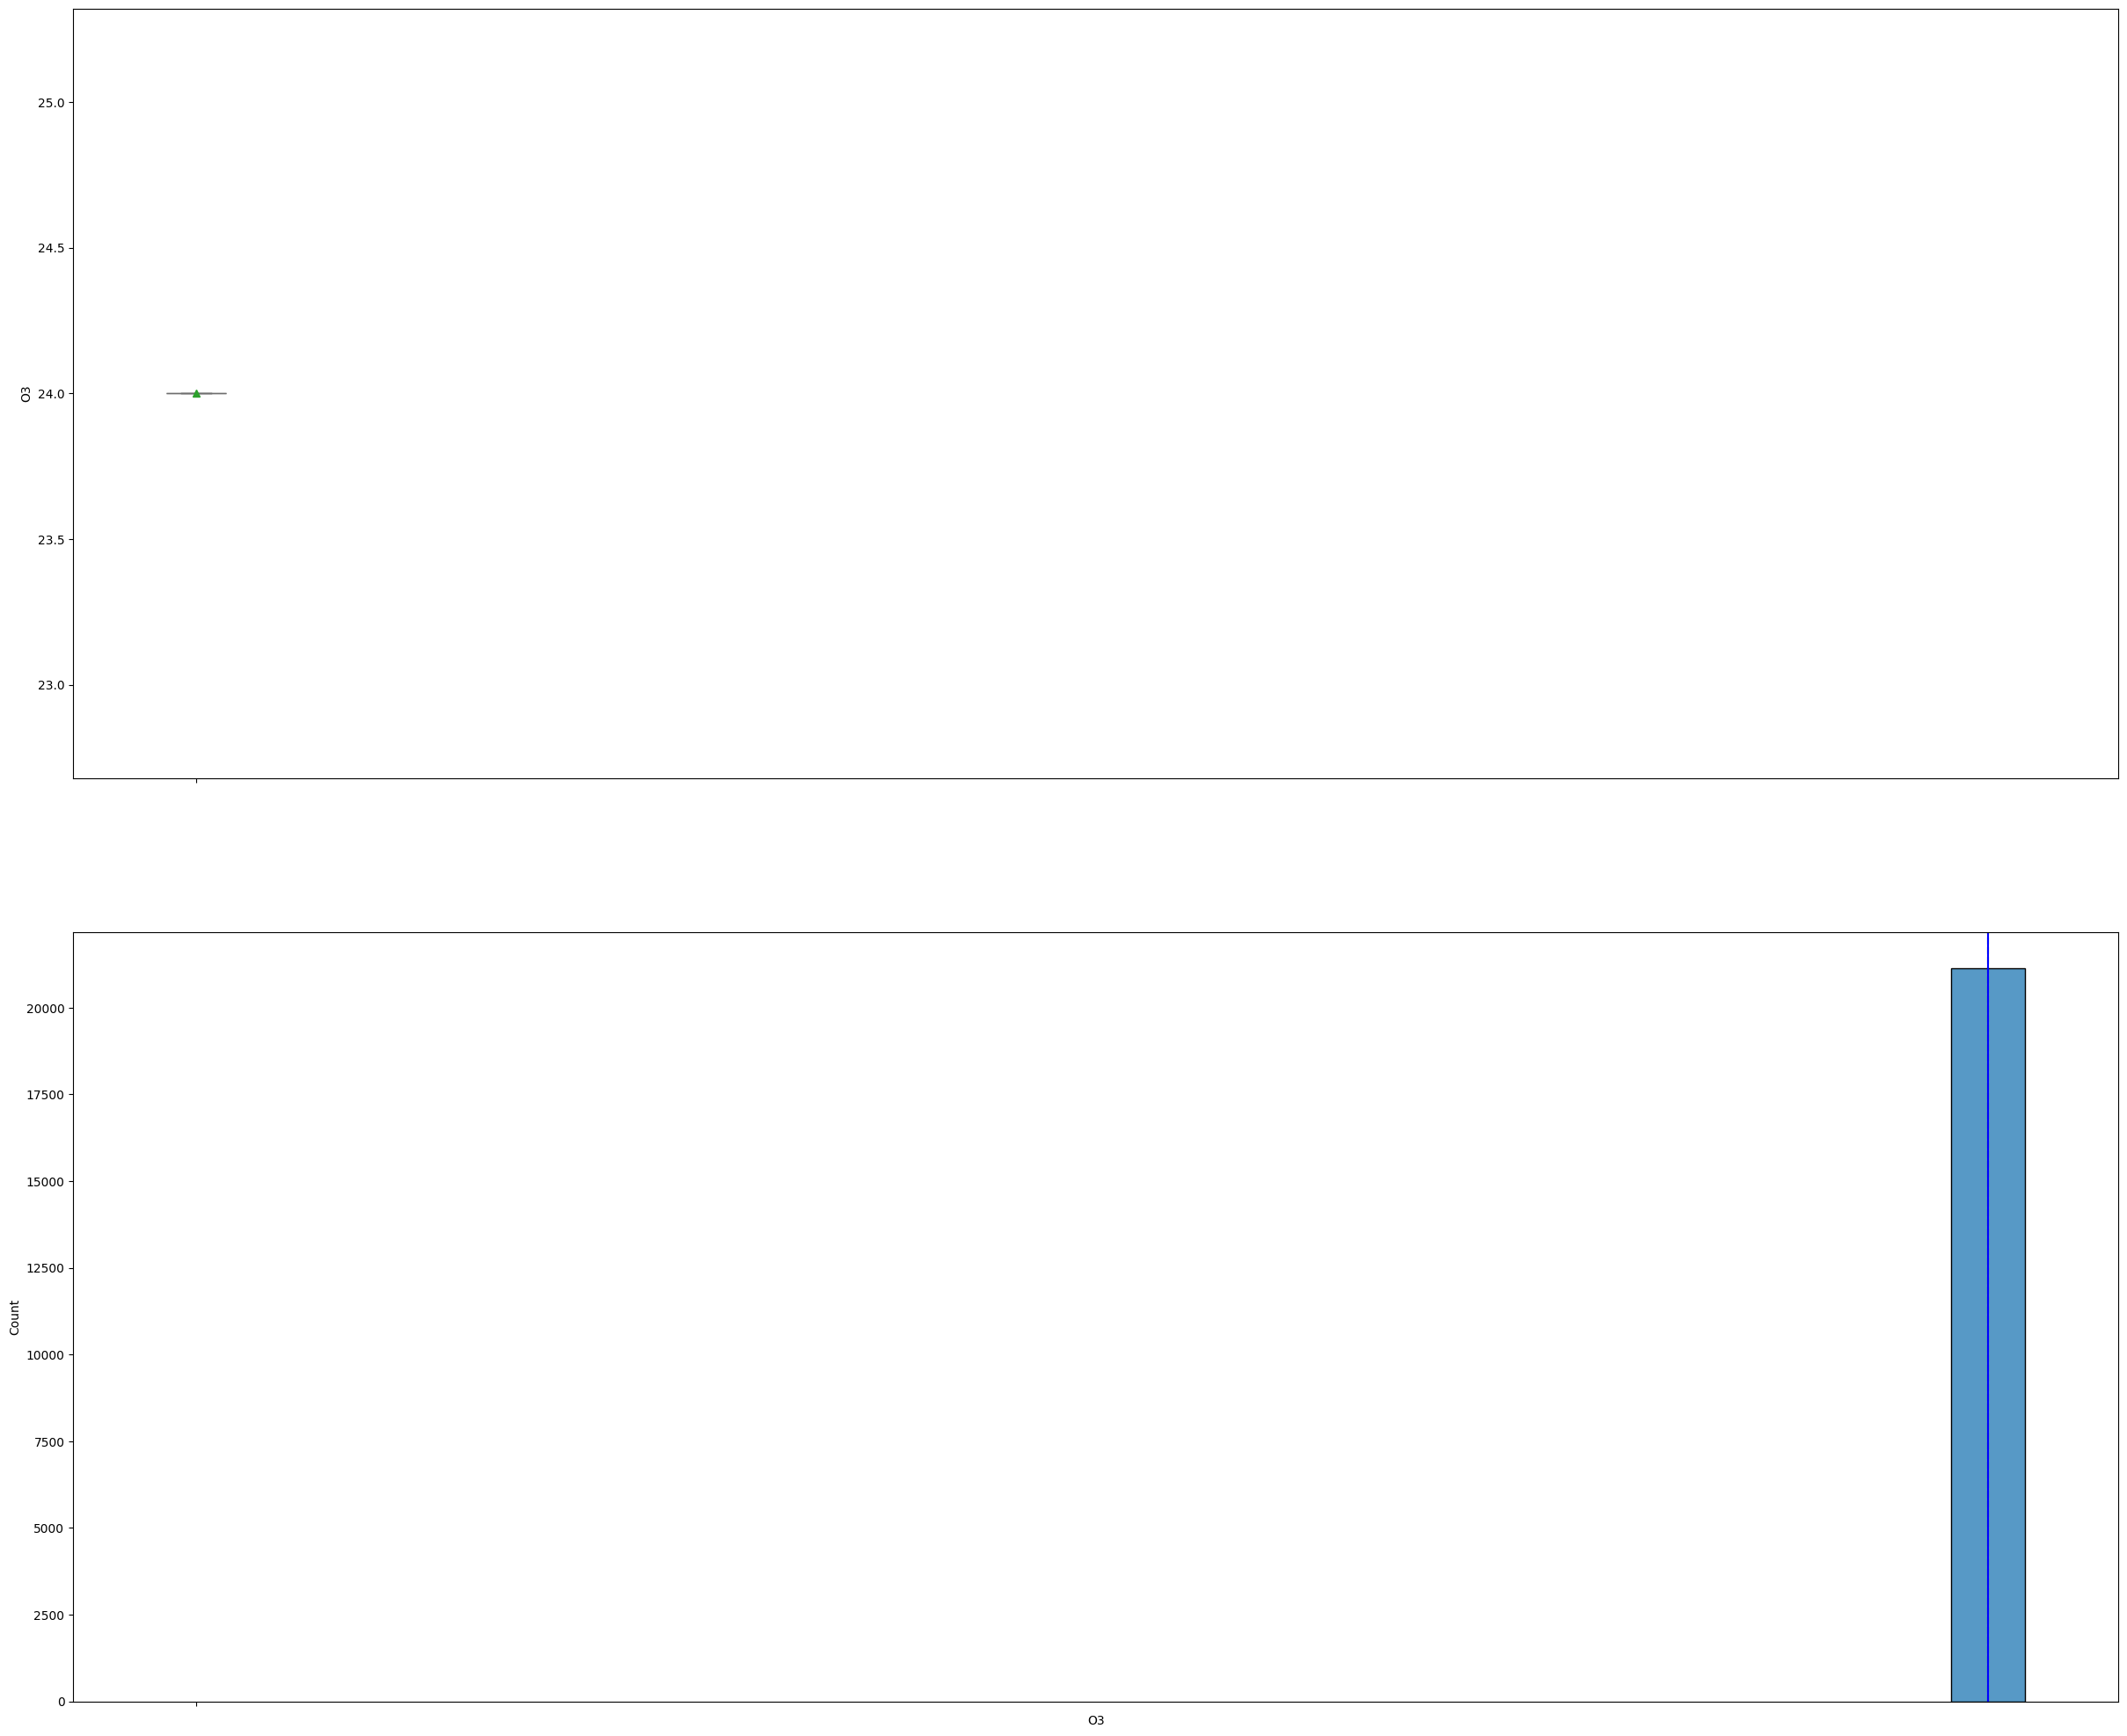

In [1237]:
histogram_boxplot(df['O3'])

In [1238]:
# Specify the column for which you want to fix outliers
target_column = 'PM25'

# Calculate the mode for the target column
mode = df[target_column].mode()[0]

# Calculate the Z-scores for the target column
z_scores = stats.zscore(df[target_column].dropna())

# Set upper and lower thresholds for outliers
upper_threshold = 160
lower_threshold = 40

# Identify outliers by Z-scores beyond the thresholds
outliers = (z_scores > upper_threshold) | (z_scores < lower_threshold)

# Replace outliers in the target column with the mode
df.loc[df[target_column].dropna().index[outliers], target_column] = mode

# Save the DataFrame with outliers fixed
# Replace 'cleaned_dataset.csv' with the desired output filename
df.to_csv('cleaned_dataset.csv', index=False)

# Print the cleaned DataFrame
print(df)


             Date            City  PM25    O3   NO2  SO2   CO
0      2023-10-02   Toronto-North  23.0  24.0  11.0  1.0  3.0
1      2023-10-03   Toronto-North  23.0  24.0  19.0  1.0  1.0
2      2023-10-04   Toronto-North  23.0  24.0  13.0  1.0  1.0
3      2023-10-05   Toronto-North  23.0  24.0   8.0  1.0  1.0
4      2023-10-06   Toronto-North  23.0  24.0   7.0  1.0  1.0
...           ...             ...   ...   ...   ...  ...  ...
21121  2015-07-18  Toronto- West   23.0  24.0   8.0  1.0  2.0
21122  2015-01-01  Toronto- West   23.0  24.0   8.0  2.0  2.0
21123  2015-01-17  Toronto- West   23.0  24.0  25.0  2.0  3.0
21124  2015-03-11  Toronto- West   23.0  24.0  20.0  2.0  2.0
21125  2014-01-01  Toronto- West   23.0  24.0  12.0  1.0  1.0

[21126 rows x 7 columns]


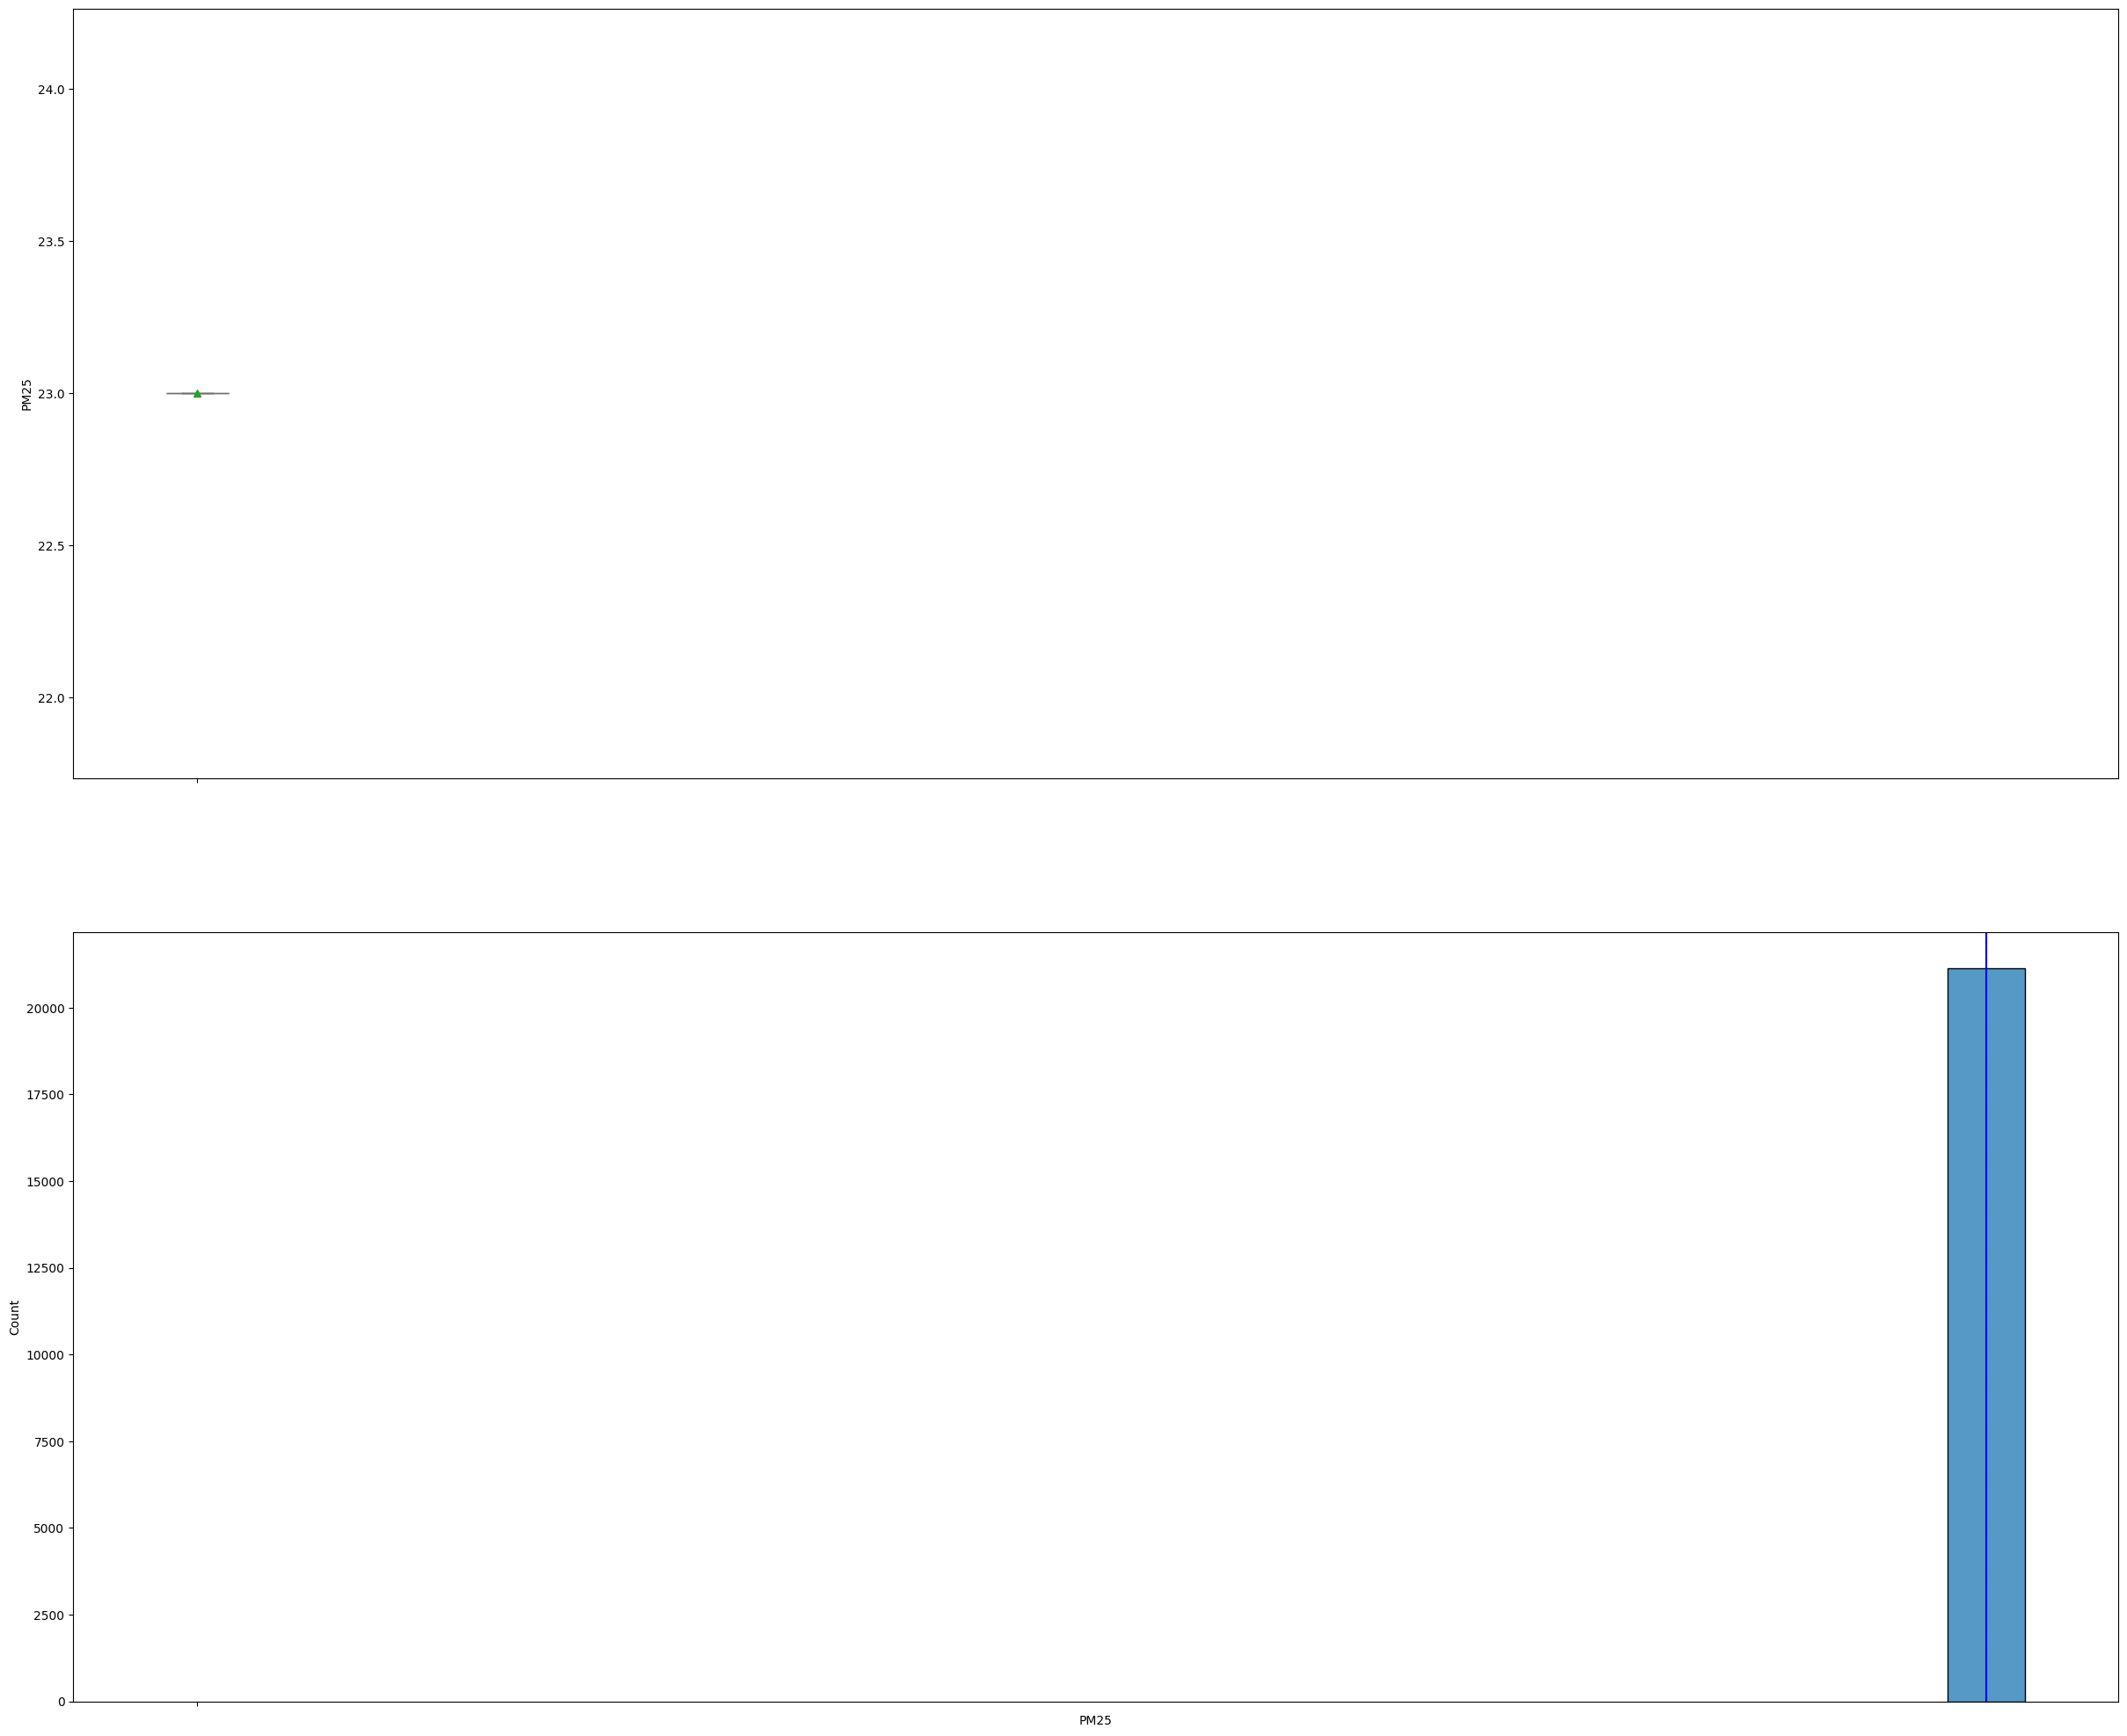

In [1239]:
histogram_boxplot(df['PM25'])

In [1240]:
# Specify the column for which you want to fix outliers
target_column = 'SO2'

# Calculate the mode for the target column
mode = df[target_column].mode()[0]

# Calculate the Z-scores for the target column
z_scores = stats.zscore(df[target_column].dropna())

# Set upper and lower thresholds for outliers
upper_threshold = 1
lower_threshold = -2.5

# Identify outliers by Z-scores beyond the thresholds
outliers = (z_scores > upper_threshold) | (z_scores < lower_threshold)

# Replace outliers in the target column with the mode
df.loc[df[target_column].dropna().index[outliers], target_column] = mode

# Save the DataFrame with outliers fixed
# Replace 'cleaned_dataset.csv' with the desired output filename
df.to_csv('cleaned_dataset.csv', index=False)

# Print the cleaned DataFrame
print(df)

             Date            City  PM25    O3   NO2  SO2   CO
0      2023-10-02   Toronto-North  23.0  24.0  11.0  1.0  3.0
1      2023-10-03   Toronto-North  23.0  24.0  19.0  1.0  1.0
2      2023-10-04   Toronto-North  23.0  24.0  13.0  1.0  1.0
3      2023-10-05   Toronto-North  23.0  24.0   8.0  1.0  1.0
4      2023-10-06   Toronto-North  23.0  24.0   7.0  1.0  1.0
...           ...             ...   ...   ...   ...  ...  ...
21121  2015-07-18  Toronto- West   23.0  24.0   8.0  1.0  2.0
21122  2015-01-01  Toronto- West   23.0  24.0   8.0  1.0  2.0
21123  2015-01-17  Toronto- West   23.0  24.0  25.0  1.0  3.0
21124  2015-03-11  Toronto- West   23.0  24.0  20.0  1.0  2.0
21125  2014-01-01  Toronto- West   23.0  24.0  12.0  1.0  1.0

[21126 rows x 7 columns]


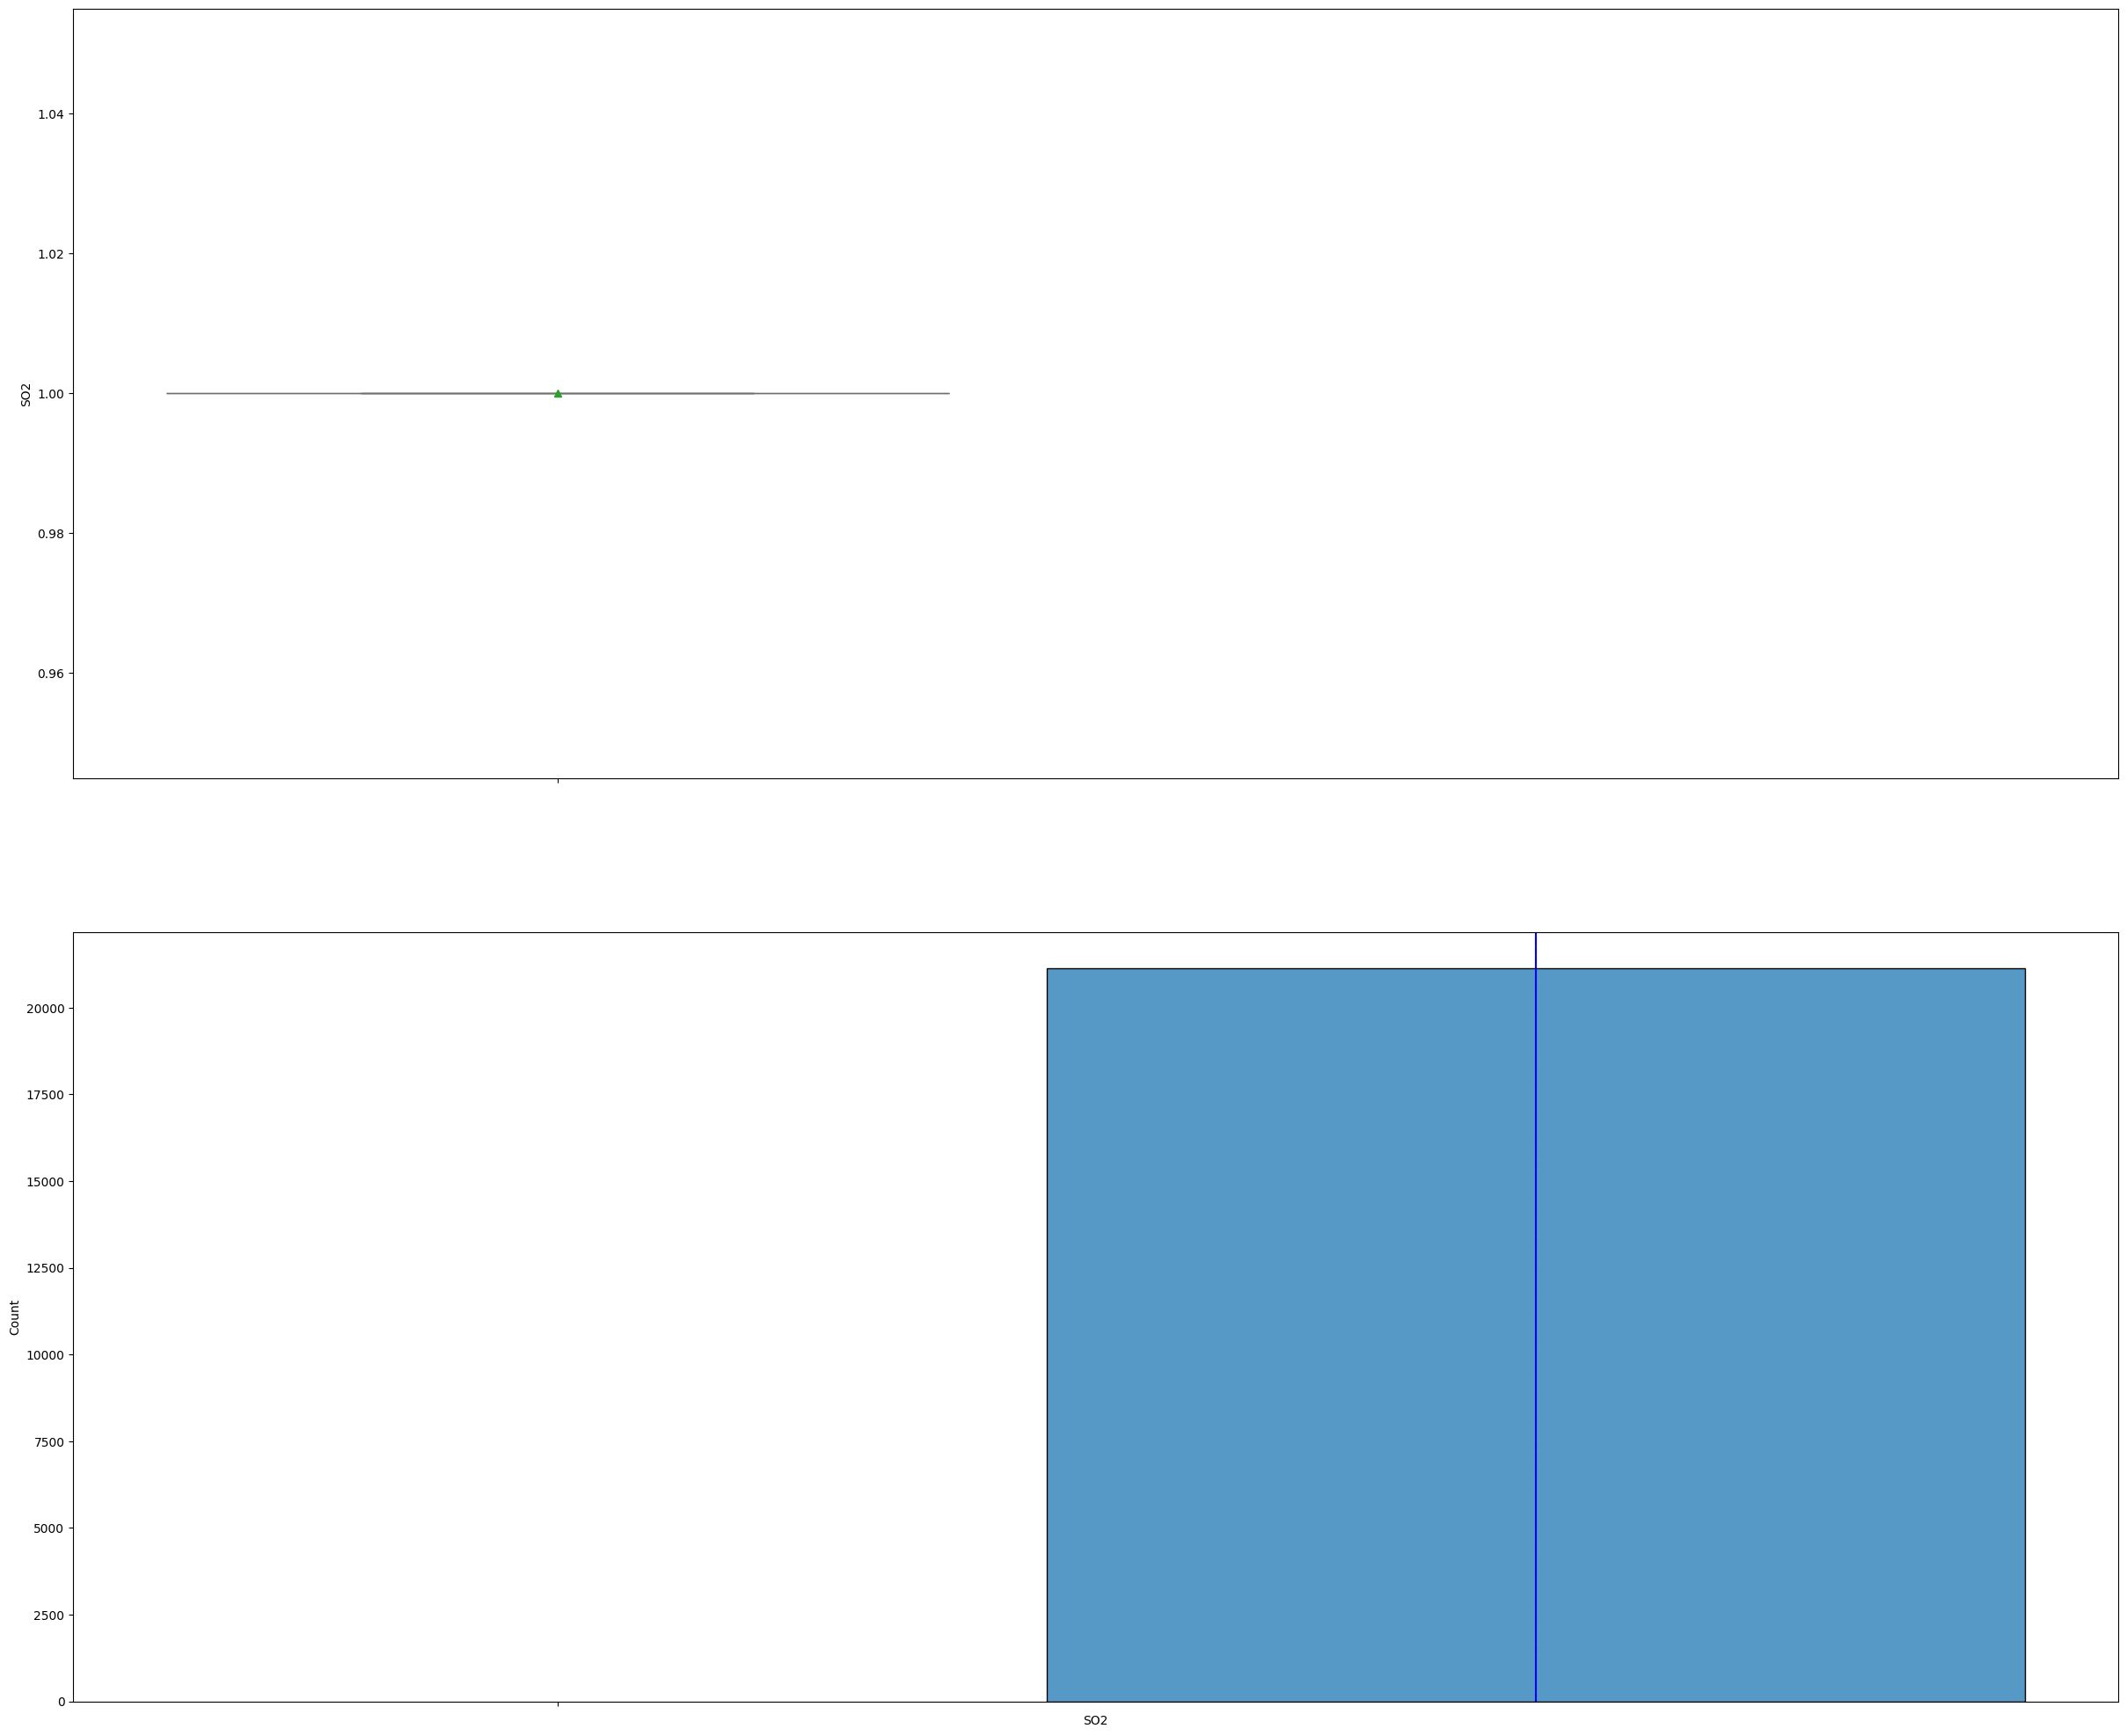

In [1241]:
histogram_boxplot(df['SO2'])

In [1242]:
# Specify the column for which you want to fix outliers
target_column = 'NO2'

# Calculate the median for the target column
median = df[target_column].median()

# Calculate the Z-scores for the target column
z_scores = stats.zscore(df[target_column].dropna())

# Set upper and lower thresholds for outliers
upper_threshold = 2.5  # Adjust this value based on your data and requirements
lower_threshold = 2.5  # Adjust this value based on your data and requirements

# Identify outliers by Z-scores beyond the thresholds
outliers = (z_scores > upper_threshold) | (z_scores < lower_threshold)

# Replace outliers in the target column with the median
df.loc[df[target_column].dropna().index[outliers], target_column] = median

# Save the DataFrame with outliers fixed
# Replace 'cleaned_dataset.csv' with the desired output filename
df.to_csv('cleaned_dataset.csv', index=False)

# Print the cleaned DataFrame
print(df)

             Date            City  PM25    O3  NO2  SO2   CO
0      2023-10-02   Toronto-North  23.0  24.0  8.0  1.0  3.0
1      2023-10-03   Toronto-North  23.0  24.0  8.0  1.0  1.0
2      2023-10-04   Toronto-North  23.0  24.0  8.0  1.0  1.0
3      2023-10-05   Toronto-North  23.0  24.0  8.0  1.0  1.0
4      2023-10-06   Toronto-North  23.0  24.0  8.0  1.0  1.0
...           ...             ...   ...   ...  ...  ...  ...
21121  2015-07-18  Toronto- West   23.0  24.0  8.0  1.0  2.0
21122  2015-01-01  Toronto- West   23.0  24.0  8.0  1.0  2.0
21123  2015-01-17  Toronto- West   23.0  24.0  8.0  1.0  3.0
21124  2015-03-11  Toronto- West   23.0  24.0  8.0  1.0  2.0
21125  2014-01-01  Toronto- West   23.0  24.0  8.0  1.0  1.0

[21126 rows x 7 columns]


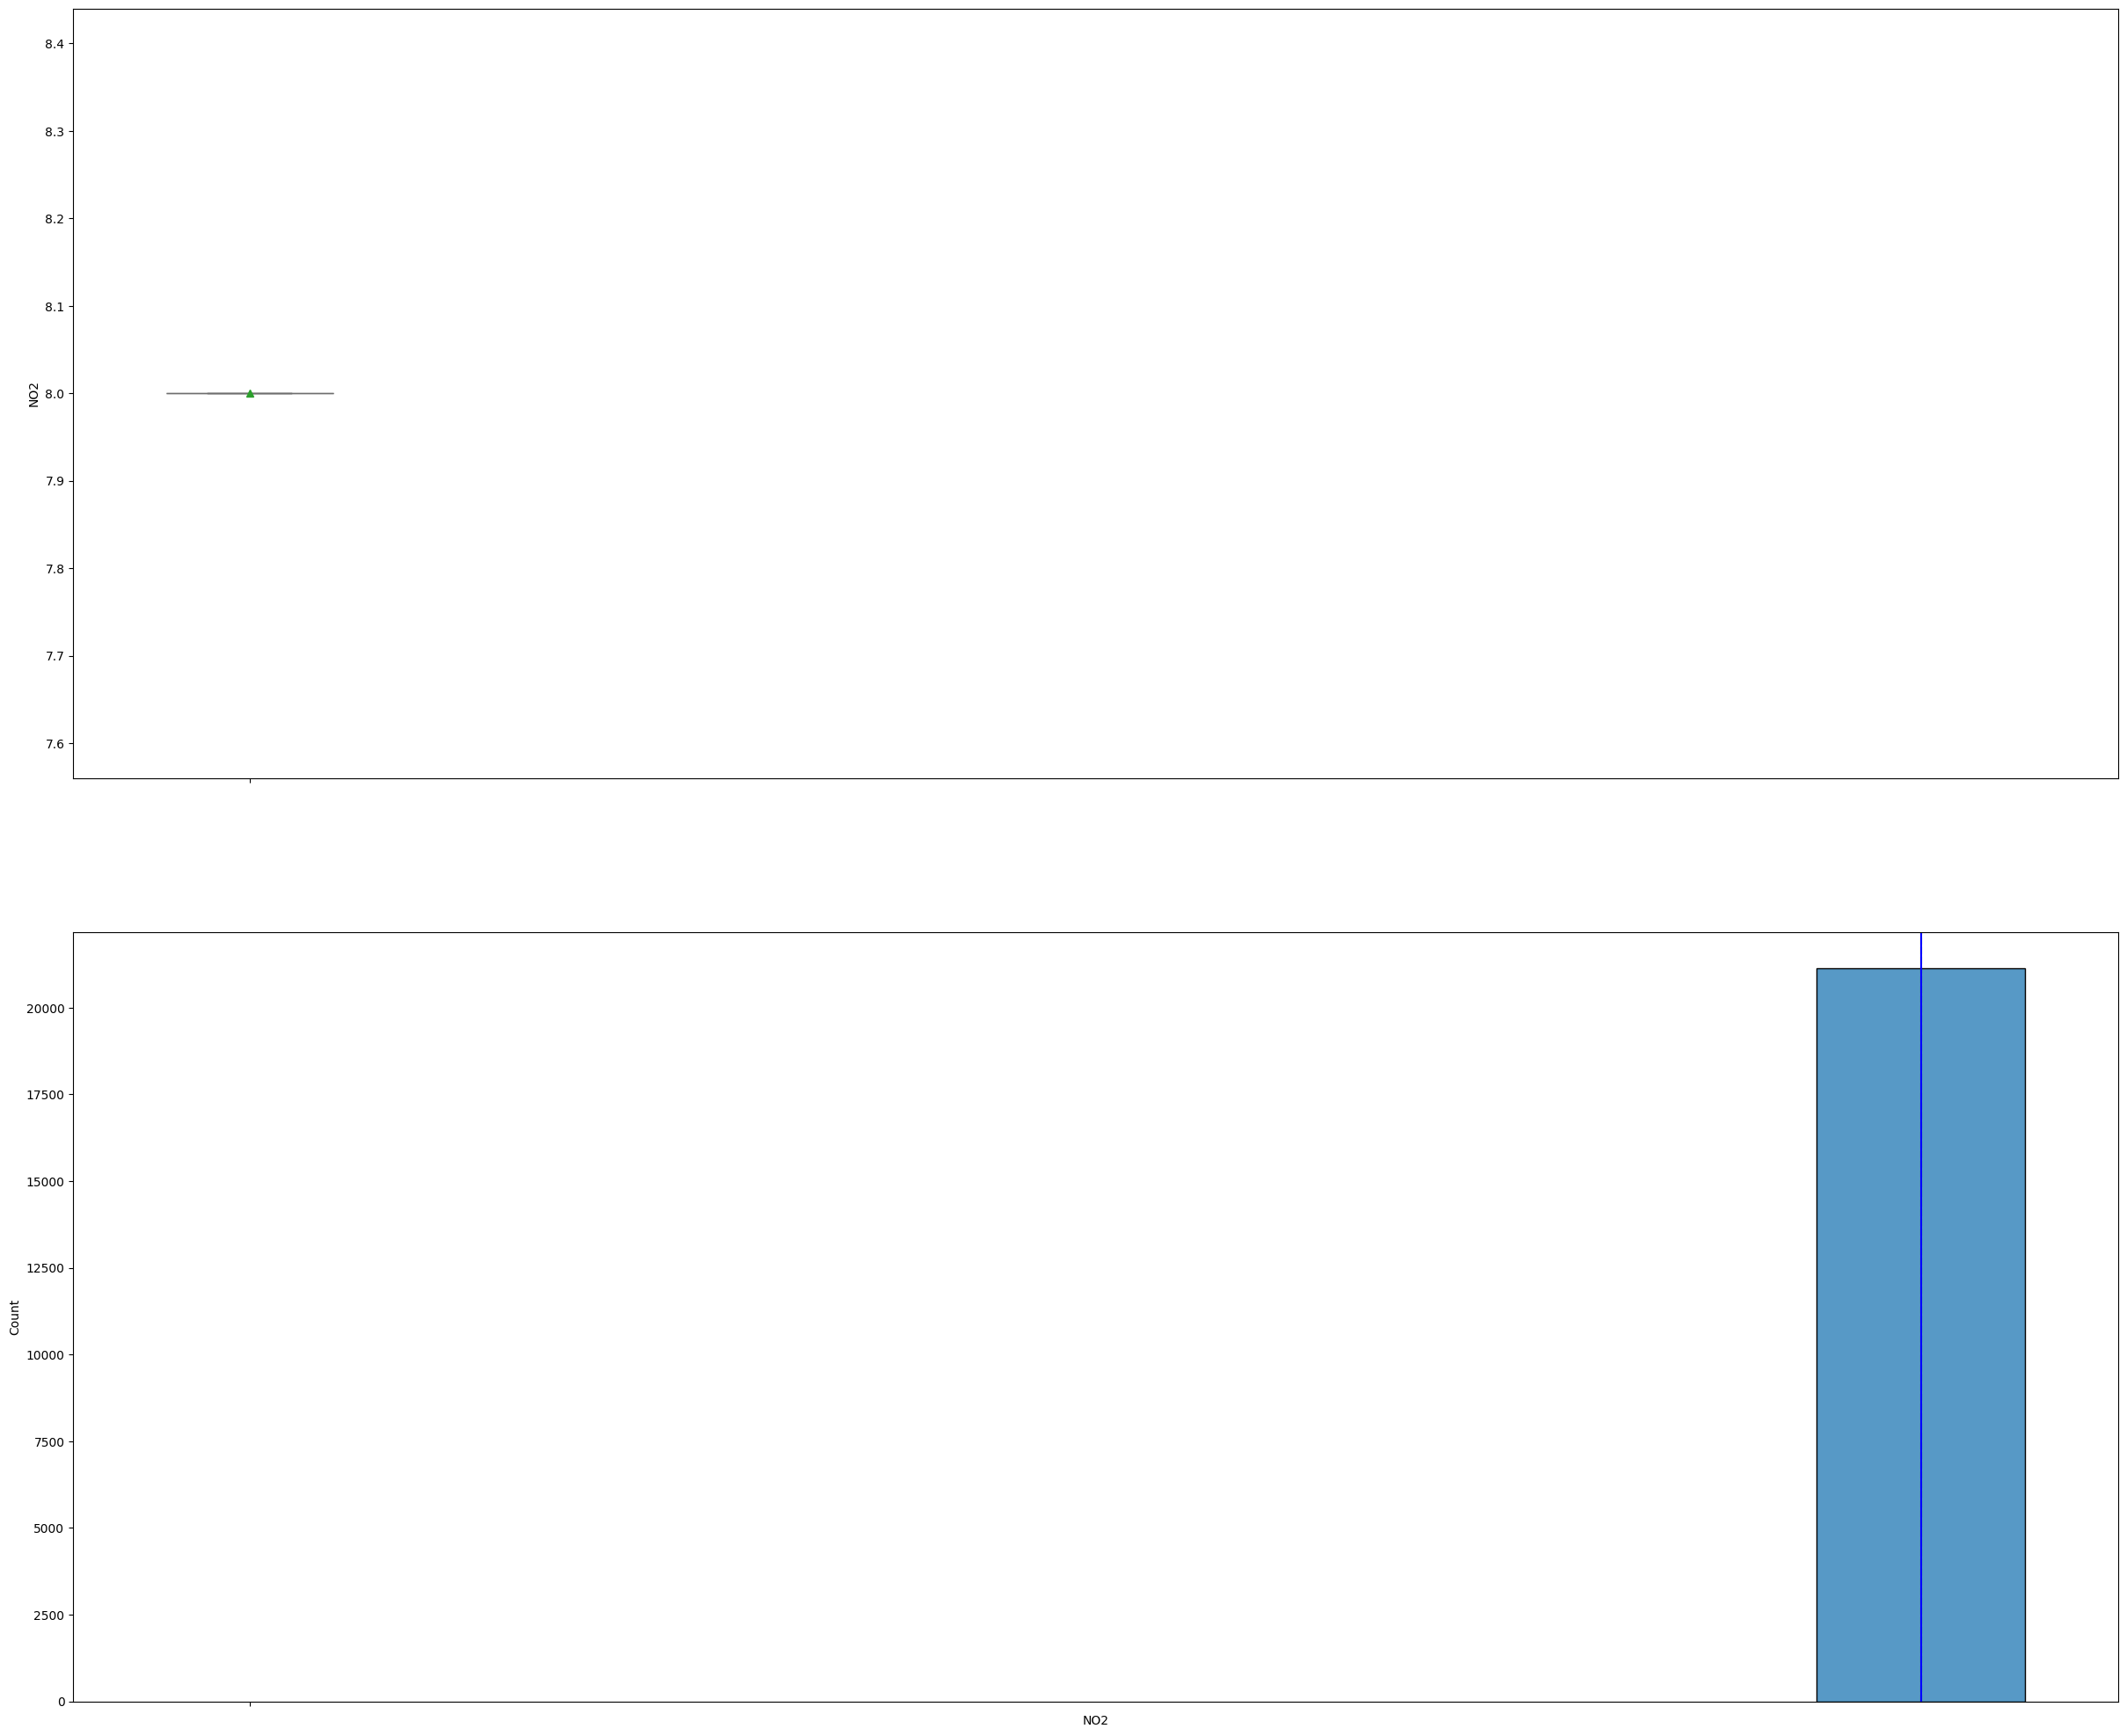

In [1243]:
histogram_boxplot(df['NO2'])

In [1244]:
# Specify the column for which you want to fix outliers
target_column = 'CO'

# Calculate the mode for the target column
mode = df[target_column].mode()[0]

# Calculate the Z-scores for the target column
z_scores = stats.zscore(df[target_column].dropna())

# Set upper and lower thresholds for outliers
upper_threshold = 6
lower_threshold = 1

# Identify outliers by Z-scores beyond the thresholds
outliers = (z_scores > upper_threshold) | (z_scores < -lower_threshold)  # Fix this line

# Replace outliers in the target column with the mode
df[target_column][outliers] = mode

# Save the DataFrame with outliers fixed
df.to_csv('cleaned_dataset.csv', index=False)

# Print the cleaned DataFrame
print(df)


             Date            City  PM25    O3  NO2  SO2   CO
0      2023-10-02   Toronto-North  23.0  24.0  8.0  1.0  3.0
1      2023-10-03   Toronto-North  23.0  24.0  8.0  1.0  2.0
2      2023-10-04   Toronto-North  23.0  24.0  8.0  1.0  2.0
3      2023-10-05   Toronto-North  23.0  24.0  8.0  1.0  2.0
4      2023-10-06   Toronto-North  23.0  24.0  8.0  1.0  2.0
...           ...             ...   ...   ...  ...  ...  ...
21121  2015-07-18  Toronto- West   23.0  24.0  8.0  1.0  2.0
21122  2015-01-01  Toronto- West   23.0  24.0  8.0  1.0  2.0
21123  2015-01-17  Toronto- West   23.0  24.0  8.0  1.0  3.0
21124  2015-03-11  Toronto- West   23.0  24.0  8.0  1.0  2.0
21125  2014-01-01  Toronto- West   23.0  24.0  8.0  1.0  2.0

[21126 rows x 7 columns]


C:\Users\sanji\AppData\Local\Temp\ipykernel_7992\1599386537.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_column][outliers] = mode


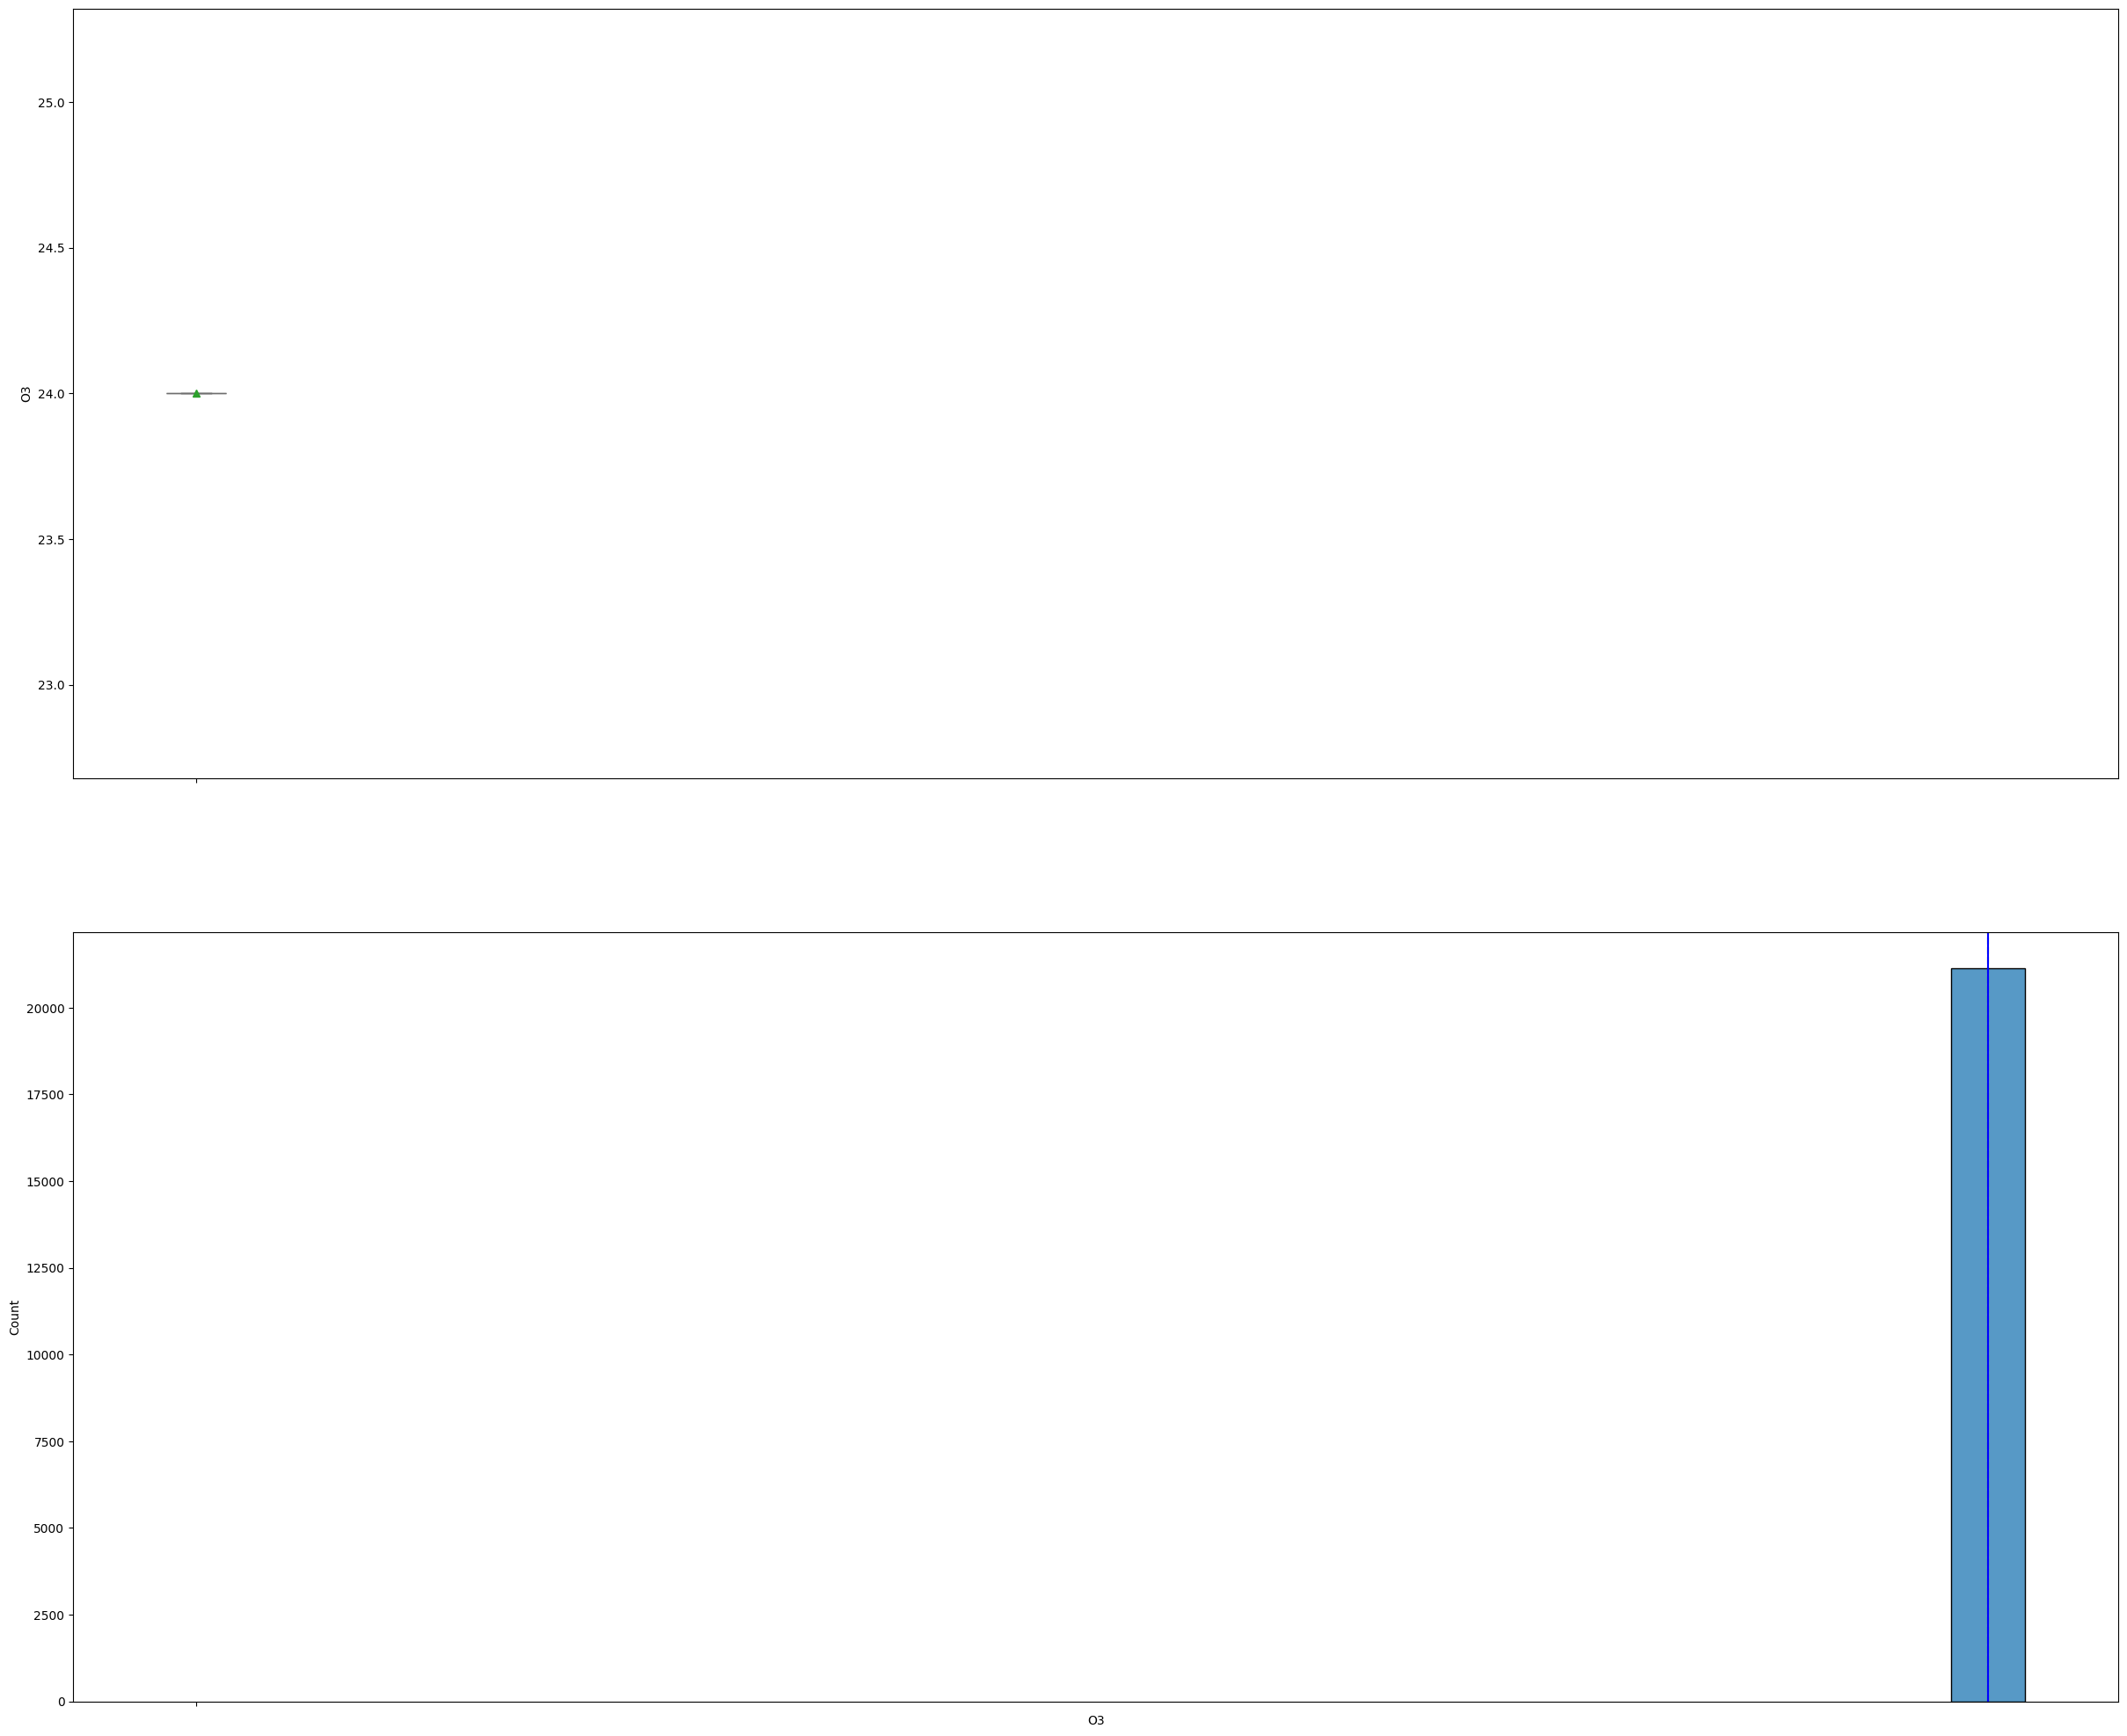

In [1245]:
histogram_boxplot(df['O3'])